# LET's PLAY FIFA

FIFA 20
 - Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports). 

 - The game is not to be confused with the official International Federation for Football (FIFA).

 - You are given the following public dataset, scraped from https://sofifa.com. The data lists soccer players from the 2015-2020 editions of EA Sports FIFA video game. It consists of player positions, player attributes, and personal data.

 - This dataset has been adopted from the kaggle dataset, which can be found here.

Problem 
The player club changes can be tracked using the unique Sofifa id across all years. The problem statement is as follows: 

#### Importing and Loading data

In [3]:
!pip install prettytable

In [12]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
from helper import plot_permute_importance, plot_feature_importance
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from prettytable import PrettyTable

from scipy import stats

%matplotlib inline


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

In [10]:
#Reading .csv files for part A

df19 = pd.read_csv('players_19.csv')
df20 = pd.read_csv('players_20.csv')

In [5]:
## reading csv files for part c

fifa_20 = pd.read_csv('players_20.csv')
fifa_19 = pd.read_csv('players_19.csv')
fifa_18 = pd.read_csv('players_18.csv')
fifa_17 = pd.read_csv('players_17.csv')
fifa_16 = pd.read_csv('players_16.csv')

In [6]:
# adding year to each coumn
fifa_20['year'] = 20
fifa_19['year'] = 19
fifa_18['year'] = 18
fifa_17['year'] = 17
fifa_16['year'] = 16

In [7]:
fifa_20.shape, fifa_19.shape, fifa_18.shape, fifa_17.shape, fifa_16.shape

((18278, 105), (17770, 105), (17592, 105), (17009, 105), (14881, 105))

In [8]:
fifa = pd.concat([fifa_20, fifa_19, fifa_18, fifa_17, fifa_16])

In [9]:
fifa.shape

(85530, 105)

# Part-A: Rank the Players 

      
Who is the best player in the world according to your analysis?
 - Use data from FIFA 19. Predict the Overall (OVR ) skill Statistic for players in the FIFA 20 Edition. Train on all players from FIFA 19

 - Graphically represent the Overall data for the players in test set (see below0

Instructions : 
 - Sofifa Id, URL, Name, Potential, Real face, URL variables cannot be used during the prediction or learning. 

 - In case of a change in playing position, alter FIFA 20 position to match FIFA 19 Position 

 - The final score will be assigned using MSE. 

Test Set: Players from the following Clubs 

 - FC Barcelona

 - FC Bayern München

 - Real Madrid 

 - Paris Saint-Germain

 - Juventus

 - Manchester City

 - Liverpool FC

In [ ]:
#Getting a view of the players_19 dataframe

df19.head()


sofifa_id                                         player_url  \
0      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
1     158023  https://sofifa.com/player/158023/lionel-messi/...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     193080  https://sofifa.com/player/193080/david-de-gea-...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name  age         dob  \
0  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   33  1985-02-05   
1           L. Messi       Lionel Andrés Messi Cuccittini   31  1987-06-24   
2          Neymar Jr        Neymar da Silva Santos Junior   26  1992-02-05   
3             De Gea                David De Gea Quintana   27  1990-11-07   
4       K. De Bruyne                      Kevin De Bruyne   27  1991-06-28   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        187         83    Portugal             Juventus       94         94   
1        170         72   Argentina         FC Barcelona       94         94   
2        175         68      Brazil  Paris Saint-Germain       92         93   
3        193         76       Spain    Manchester United       91         93   
4        181         70     Belgium      Manchester City       91         92   

   value_eur  wage_eur player_positions preferred_foot  \
0   77000000    405000           ST, LW          Right   
1  110500000    565000       CF, RW, ST           Left   
2  118500000    290000          LW, CAM          Right   
3   72000000    260000               GK          Right   
4  102000000    355000          CAM, CM          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            5       High/Low   
1                         5          4            4  Medium/Medium   
2                         5          5            5    High/Medium   
3                         4          3            1  Medium/Medium   
4                         4          5            4      High/High   

    body_type real_face  release_clause_eur  \
0  C. Ronaldo       Yes         127100000.0   
1       Messi       Yes         226500000.0   
2      Neymar       Yes         228100000.0   
3        Lean       Yes         138600000.0   
4      Normal       Yes         196400000.0   

                                         player_tags team_position  \
0  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
1  #Dribbler, #Distance Shooter, #FK Specialist, ...            RW   
2  #Speedster, #Dribbler, #FK Specialist, #Acroba...           CAM   
3                                                NaN            GK   
4  #Dribbler, #Playmaker  , #Engine, #Distance Sh...           RCM   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                 7.0         NaN  2018-07-10                2022.0   
1                10.0         NaN  2004-07-01                2021.0   
2                10.0         NaN  2017-08-03                2022.0   
3                 1.0         NaN  2011-07-01                2019.0   
4                17.0         NaN  2015-08-30                2023.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0              LS                   7.0  90.0      93.0     81.0       89.0   
1              CF                  10.0  88.0      91.0     88.0       96.0   
2              LW                  10.0  92.0      84.0     83.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4             RCM                   7.0  77.0      86.0     92.0       87.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       35.0    79.0        NaN          NaN         NaN          NaN   
1       32.0    61.0        NaN          NaN         NaN          NaN   
2       32.0    59.0        NaN          NaN         Na

## EDA

In [ ]:
#Range of overall skill (The predictor variable)

print(f'The minimum overall skill value is {min(df19.overall.values)} and the maximum is {max(df19.overall.values)}')

The minimum overall skill value is 47 and the maximum is 94


**Preprocessing**

1. Checking datatype of column values in a dataframe

In [ ]:
print("The datatypes of columns in the dataframe are: ")
print(df19.dtypes)

The datatypes of columns in the dataframe are: 
sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
te

2. Checking the null values count

In [ ]:
#Checking null/NA values in columns
print(f'The percentage of null/NA values per column in a dataframe  is (%): \n')
 
columns = ["Columns", "Percentage (%)"]
  
myTable = PrettyTable()
sum=[]
col_int=[]
# Add Columns

for i in df19.columns:
  # if df19[i].dtypes !=object:
    sum.append(round(df19[i]. isnull(). sum()/len(df19)*100, 2))
    col_int.append(i)
myTable.add_column(columns[0], col_int)
myTable.add_column(columns[1], sum)
print(myTable)

The percentage of null/NA values per column in a dataframe  is (%): 

+----------------------------+----------------+
|          Columns           | Percentage (%) |
+----------------------------+----------------+
|         sofifa_id          |      0.0       |
|         player_url         |      0.0       |
|         short_name         |      0.0       |
|         long_name          |      0.0       |
|            age             |      0.0       |
|            dob             |      0.0       |
|         height_cm          |      0.0       |
|         weight_kg          |      0.0       |
|        nationality         |      0.0       |
|            club            |      0.0       |
|          overall           |      0.0       |
|         potential          |      0.0       |
|         value_eur          |      0.0       |
|          wage_eur          |      0.0       |
|      player_positions      |      0.0       |
|       preferred_foot       |      0.0       |
|  international_r

Therefore, clearly columns having null values greater that 50 % shall be dropped as they don't have sufficient information to train the model. So, as per the null values count above, the feature columns dropped are:


1.   nation_jersey_number 
2.   gk_diving 
3.   gk_handling
4.   gk_kicking
5.   gk_reflexes 
6.   gk_speed  
7.   gk_positioning 
8.   player_traits
9.   player_tags
10.  loaned_from
11.  nation_position





In [ ]:
#Dropping Feature columns
df19.drop(columns=["nation_jersey_number","gk_diving","gk_handling","gk_kicking","gk_reflexes","gk_speed","gk_positioning", "player_traits","player_tags","loaned_from", "nation_position"], inplace=True)

The $player$ _$positions$ column contains multiple postions for a several players. So we have tried to one hot encode it manually by creating separate rows for positions and then assigning a count for the number of positions respective to the player

In [ ]:
# Encoding player position column

df = df19['player_positions'].str.get_dummies(sep = ', ').add_prefix('P_')
df.head()

P_CAM  P_CB  P_CDM  P_CF  P_CM  P_GK  P_LB  P_LM  P_LW  P_LWB  P_RB  P_RM  \
0      0     0      0     0     0     0     0     0     1      0     0     0   
1      0     0      0     1     0     0     0     0     0      0     0     0   
2      1     0      0     0     0     0     0     0     1      0     0     0   
3      0     0      0     0     0     1     0     0     0      0     0     0   
4      1     0      0     0     1     0     0     0     0      0     0     0   

   P_RW  P_RWB  P_ST  
0     0      0     1  
1     1      0     1  
2     0      0     0  
3     0      0     0  
4     0      0     0

In [ ]:
# Filling the na values with 0
df.fillna(0, inplace=True) 
df.head(20)

#Concatenating player positions dataframe with the original one
df19 = pd.concat([df19, df], axis=1)

# Dropping player position column 
df19.drop(columns=["player_positions"], inplace=True)
df19.head()

sofifa_id                                         player_url  \
0      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
1     158023  https://sofifa.com/player/158023/lionel-messi/...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     193080  https://sofifa.com/player/193080/david-de-gea-...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name  age         dob  \
0  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   33  1985-02-05   
1           L. Messi       Lionel Andrés Messi Cuccittini   31  1987-06-24   
2          Neymar Jr        Neymar da Silva Santos Junior   26  1992-02-05   
3             De Gea                David De Gea Quintana   27  1990-11-07   
4       K. De Bruyne                      Kevin De Bruyne   27  1991-06-28   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        187         83    Portugal             Juventus       94         94   
1        170         72   Argentina         FC Barcelona       94         94   
2        175         68      Brazil  Paris Saint-Germain       92         93   
3        193         76       Spain    Manchester United       91         93   
4        181         70     Belgium      Manchester City       91         92   

   value_eur  wage_eur preferred_foot  international_reputation  weak_foot  \
0   77000000    405000          Right                         5          4   
1  110500000    565000           Left                         5          4   
2  118500000    290000          Right                         5          5   
3   72000000    260000          Right                         4          3   
4  102000000    355000          Right                         4          5   

   skill_moves      work_rate   body_type real_face  release_clause_eur  \
0            5       High/Low  C. Ronaldo       Yes         127100000.0   
1            4  Medium/Medium       Messi       Yes         226500000.0   
2            5    High/Medium      Neymar       Yes         228100000.0   
3            1  Medium/Medium        Lean       Yes         138600000.0   
4            4      High/High      Normal       Yes         196400000.0   

  team_position  team_jersey_number      joined  contract_valid_until  pace  \
0            LW                 7.0  2018-07-10                2022.0  90.0   
1            RW                10.0  2004-07-01                2021.0  88.0   
2           CAM                10.0  2017-08-03                2022.0  92.0   
3            GK                 1.0  2011-07-01                2019.0   NaN   
4           RCM                17.0  2015-08-30                2023.0  77.0   

   shooting  passing  dribbling  defending  physic attacking_crossing  \
0      93.0     81.0       89.0       35.0    79.0                 84   
1      91.0     88.0       96.0       32.0    61.0                 77   
2      84.0     83.0       95.0       32.0    59.0                 79   
3       NaN      NaN        NaN        NaN     NaN                 17   
4      86.0     92.0       87.0       60.0    78.0                 93   

  attacking_finishing attacking_heading_accuracy attacking_short_passing  \
0                  94                         89                      81   
1                  95                         70                      90   
2                  87                         62                      84   
3                  13                         21                      50   
4                  83                         55                      92   

  attacking_volleys skill_dribbling skill_curve skill_fk_accuracy  \
0                87              88          81                76   
1                86              97          93                94   
2                84              96          88                87   
3                13              18          21                19   
4             

3. Preprocessing columns of 'object' type

From columns $attacking$_$crossing$ to $rb$, we have numbers like '98+2', '76-2', etc. in the from of strings, so we have calculated their value based on sign and converted them to float for further processing

In [ ]:
# Dealing with columns from "attacking_crossing" to "rb"

for i in range (list(df19.columns).index("attacking_crossing"),list(df19.columns).index("rb")+1 ):
  
   sum=[]
   for j in range(len(df19)):
    #Checking whether the datatype is not int/float of any single value 
    if type(df19[df19.columns[i]].values[j])!=float and type(df19[df19.columns[i]].values[j])!= int: 
     
     #Checking whether the string has '+'sign between numbers and add them accordingly
     if (df19[df19.columns[i]].values[j].count('+')==1): 
      sum.append(float(df19[df19.columns[i]].values[j].split("+")[0]) + float(df19[df19.columns[i]].values[j].split("+")[1]))

     #Checking whether the string has '-'sign between numbers and subtract them accordingly 
     elif (df19[df19.columns[i]].values[j].count('-')==1):
      sum.append(float(df19[df19.columns[i]].values[j].split("-")[0]) - float(df19[df19.columns[i]].values[j].split("-")[1]))

     #Retaining all other values as it is 
     else:
      sum.append(float(df19[df19.columns[i]].values[j]))

    else:
      sum.append(df19[df19.columns[i]].values[j])
   df19[df19.columns[i]] =sum

   #Filling all the columns' NA values with 0.0
   df19[df19.columns[i]]= df19[df19.columns[i]].fillna(0.0)

Text(0.5, 1.0, 'Correlation of overall with columns ranging from attacking_crossing to rb')

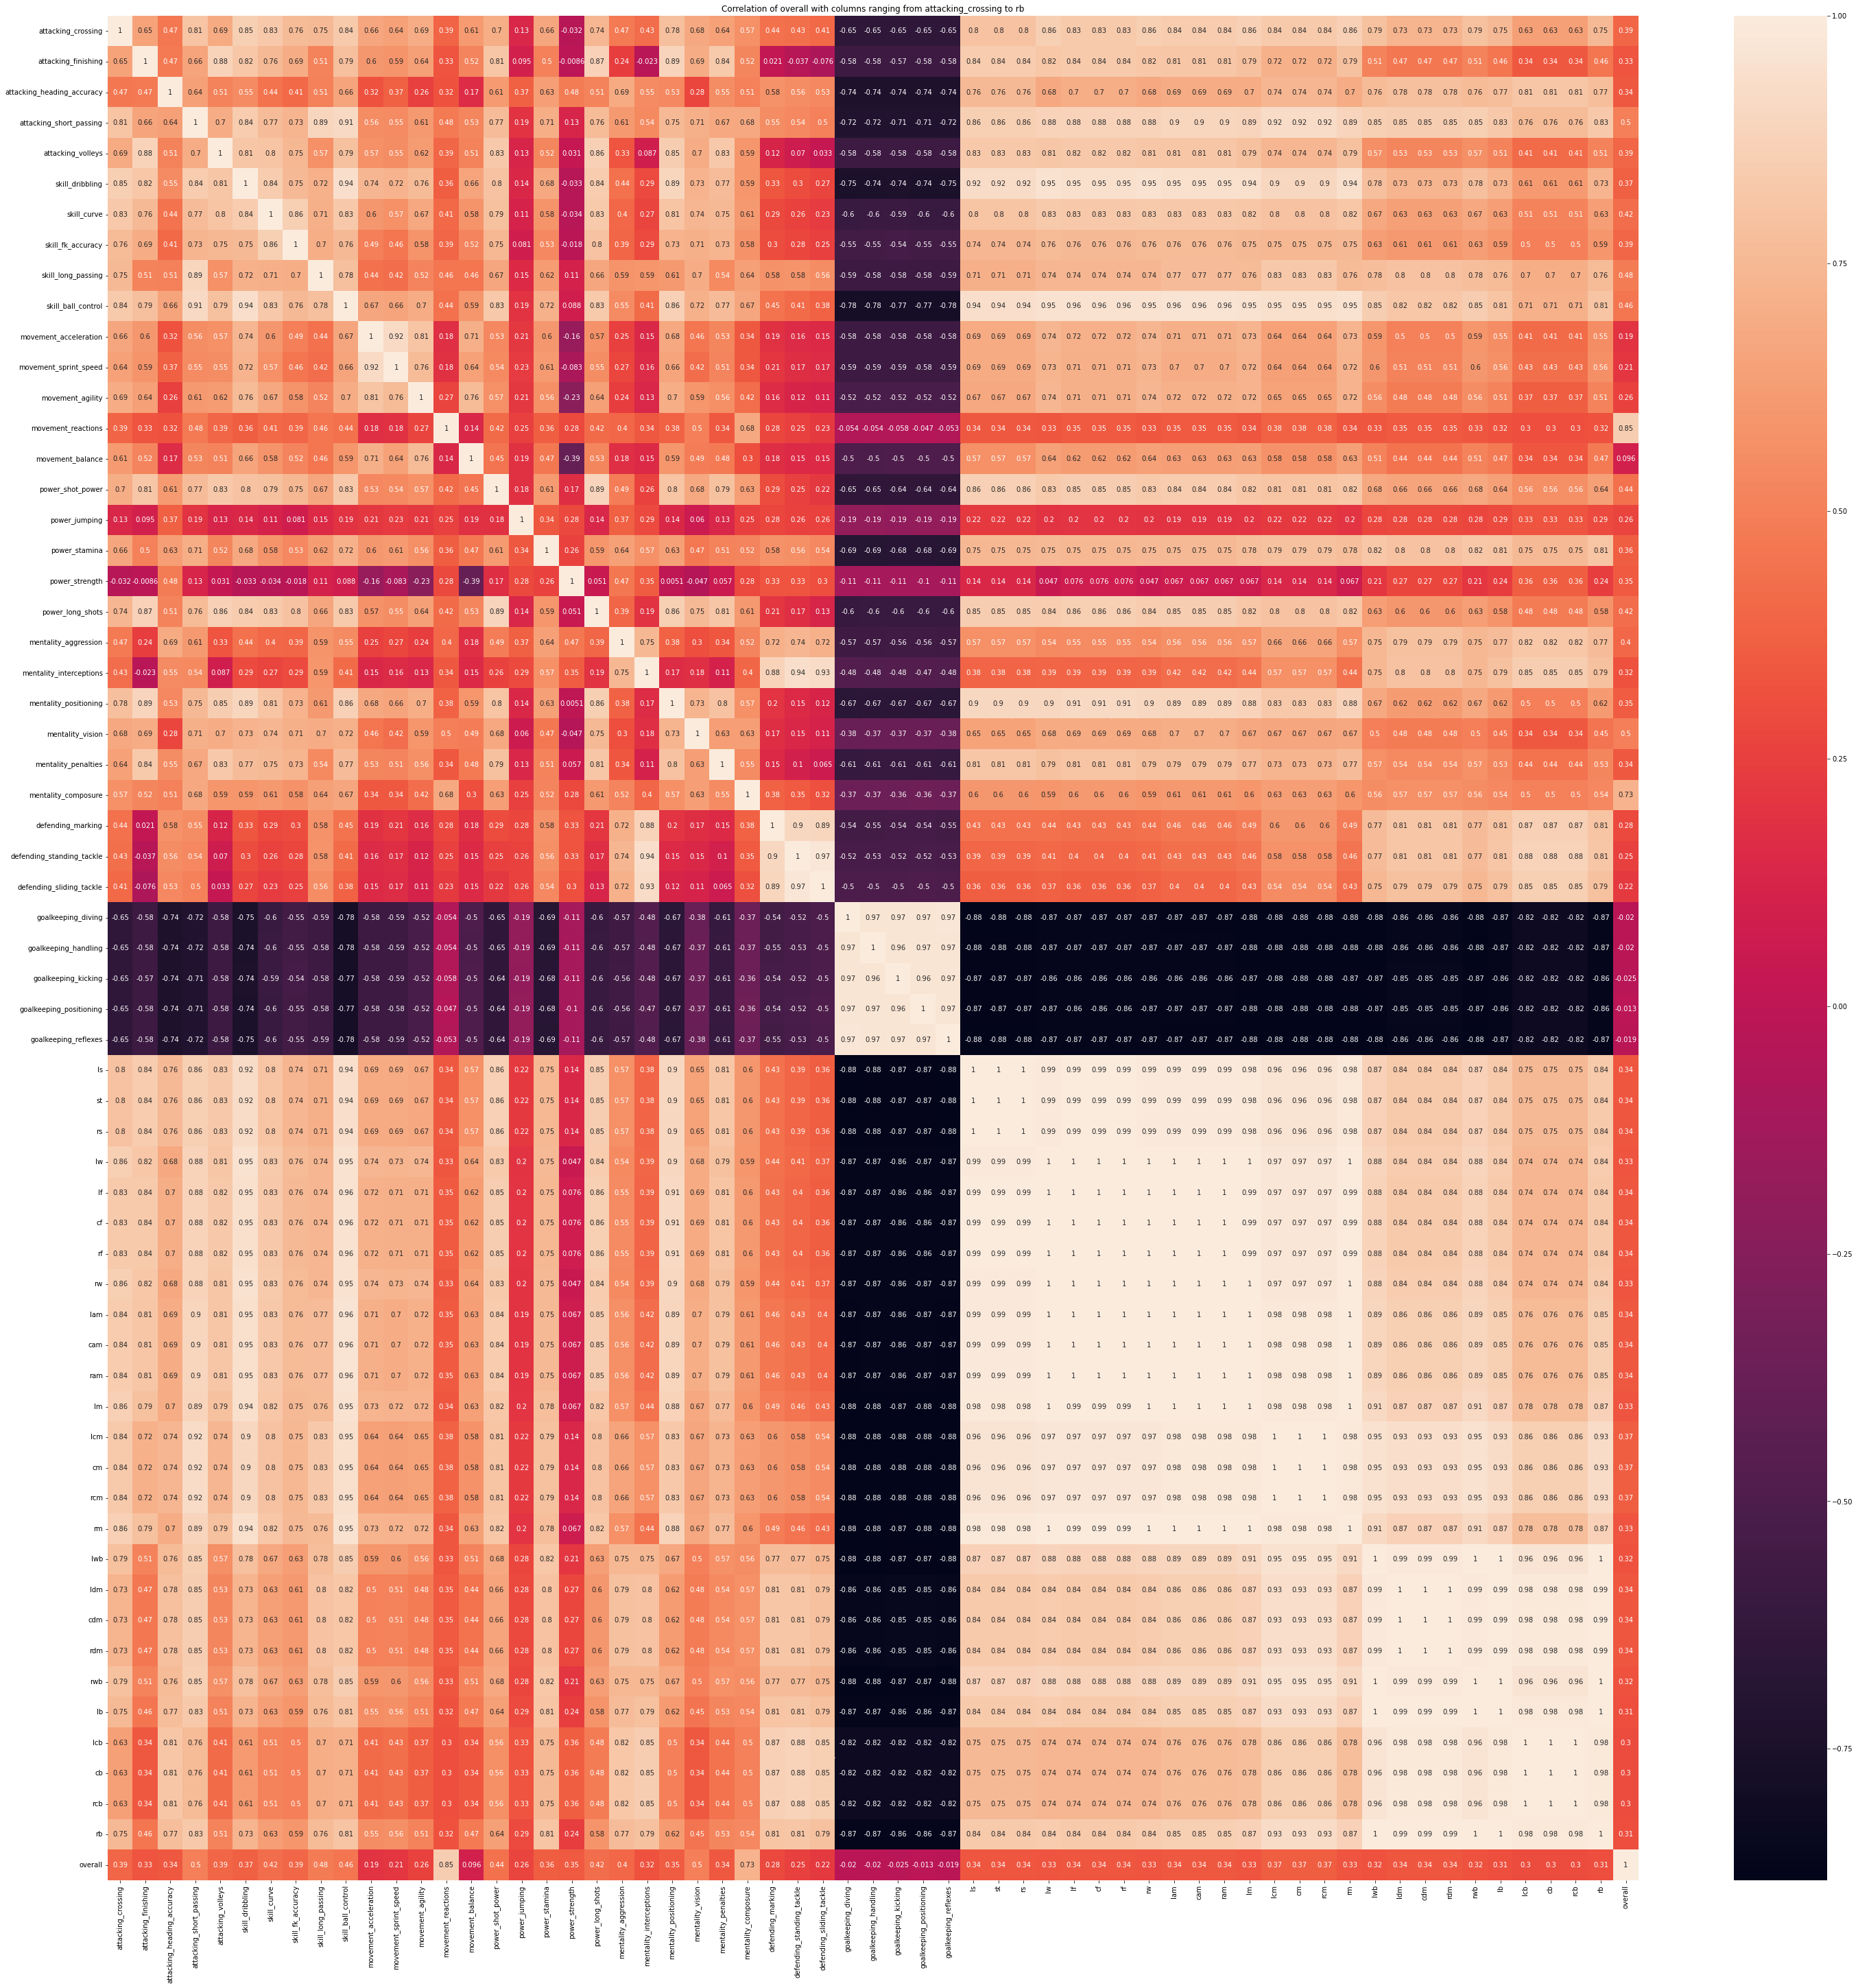

In [ ]:
#Viewing heatmap for dataframe
df = pd.DataFrame()
for i in range (list(df19.columns).index("attacking_crossing"),list(df19.columns).index("rb")+1 ):
  df[df19.columns[i]] = df19[df19.columns[i]]
df["overall"] = df19["overall"]
fig,ax= plt.subplots(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)
ax.set_title("Correlation of overall with columns ranging from attacking_crossing to rb")

From the heatmap correlation values in the above plot, it is very clear to see which features are having better correlation with the response variable. We have kept a $threshold$ of 0.4 to filter feature columns for our model training. So columns having correlation greater than 0.4 are following:

1. skill_curve
2. skill_long_passing
3. skill_ball_control
4. movement_reactions
5. power_shot_power
6. power_long_shots
7. mentality_aggression
8. mentality_vision
9. mentality_composure
10. attacking_short_passing




We are still left with columns like pace, shooting, passing, dribbling, defending and physic which consists of NA values, so let us fill all the NA values with NA

In [ ]:
#Filling null values with 0

for i in range (list(df19.columns).index("pace"),list(df19.columns).index("release_clause_eur")+1 ):
  df19[df19.columns[i]] = df19[df19.columns[i]].fillna(0.0)

Text(0.5, 1.0, 'Correlation of Overall value with physical attributes')

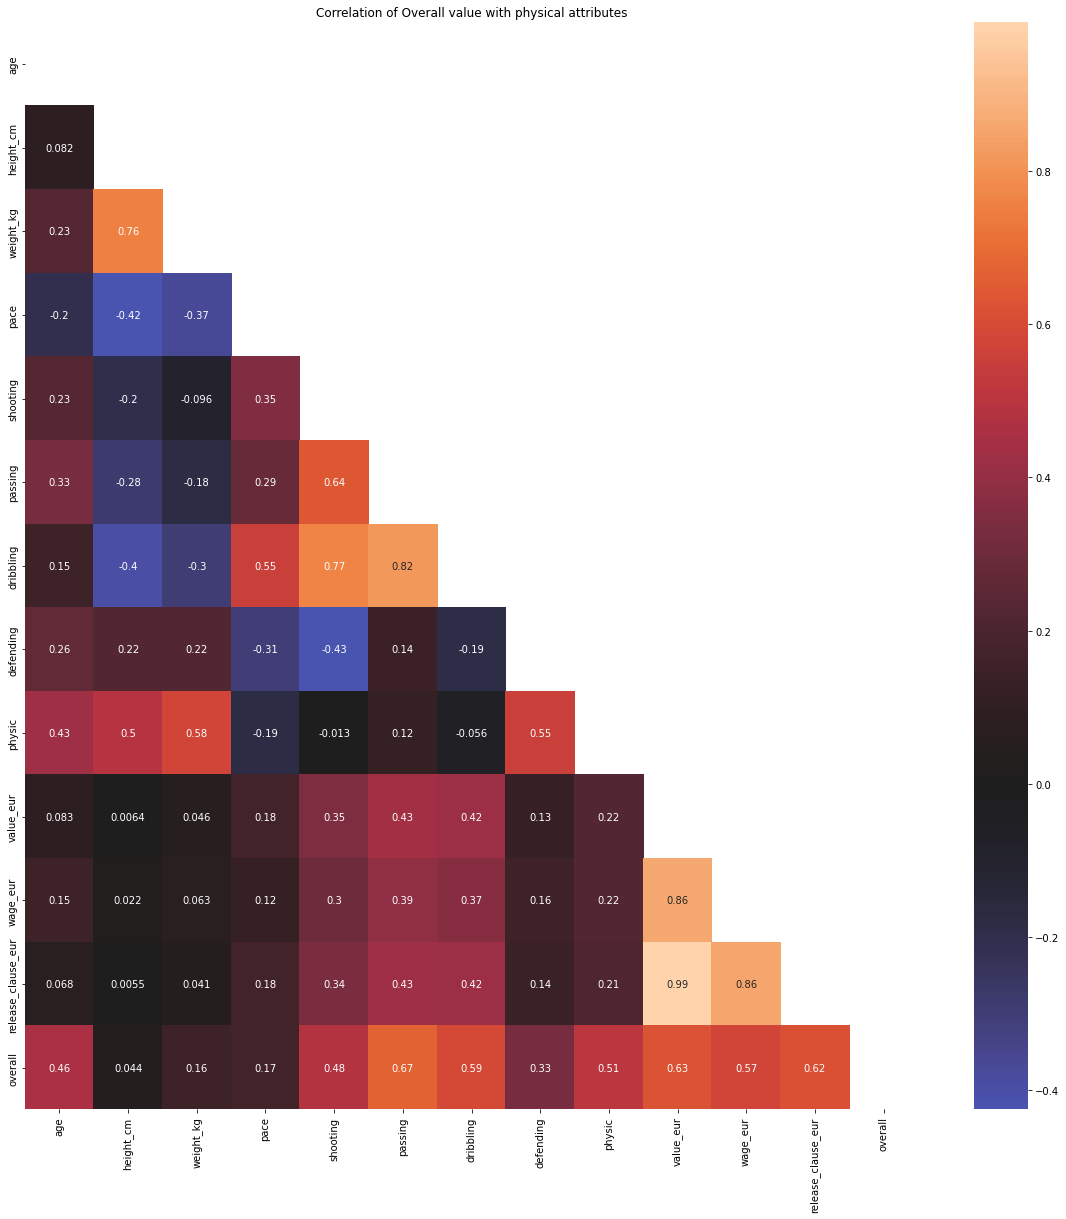

In [ ]:
#Heatmap with physical attributes

fig,ax= plt.subplots(figsize=(20,20))
df_corr= df19[["age","height_cm","weight_kg","pace","shooting","passing","dribbling","defending","physic","value_eur","wage_eur","release_clause_eur", "overall"]] 
mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))
ax =sns.heatmap(df_corr.corr(), annot=True, center=0, mask=mask)
ax.set_title("Correlation of Overall value with physical attributes")
# ax = sns.heatmap(df_corr, vmin=0, vmax=1)

From the heatmap correlation values in the above plot, it is very clear to see which features are having better correlation with the response variable. We have kept a $threshold$ of 0.4 to filter feature columns for our model training. So columns having correlation greater than 0.4 are following:

1. age
2. value_eur
3. wage_eur
4. release_clause_eur


Text(0.5, 0.98, 'Trend visualisation of the predictiors with overall response variable')

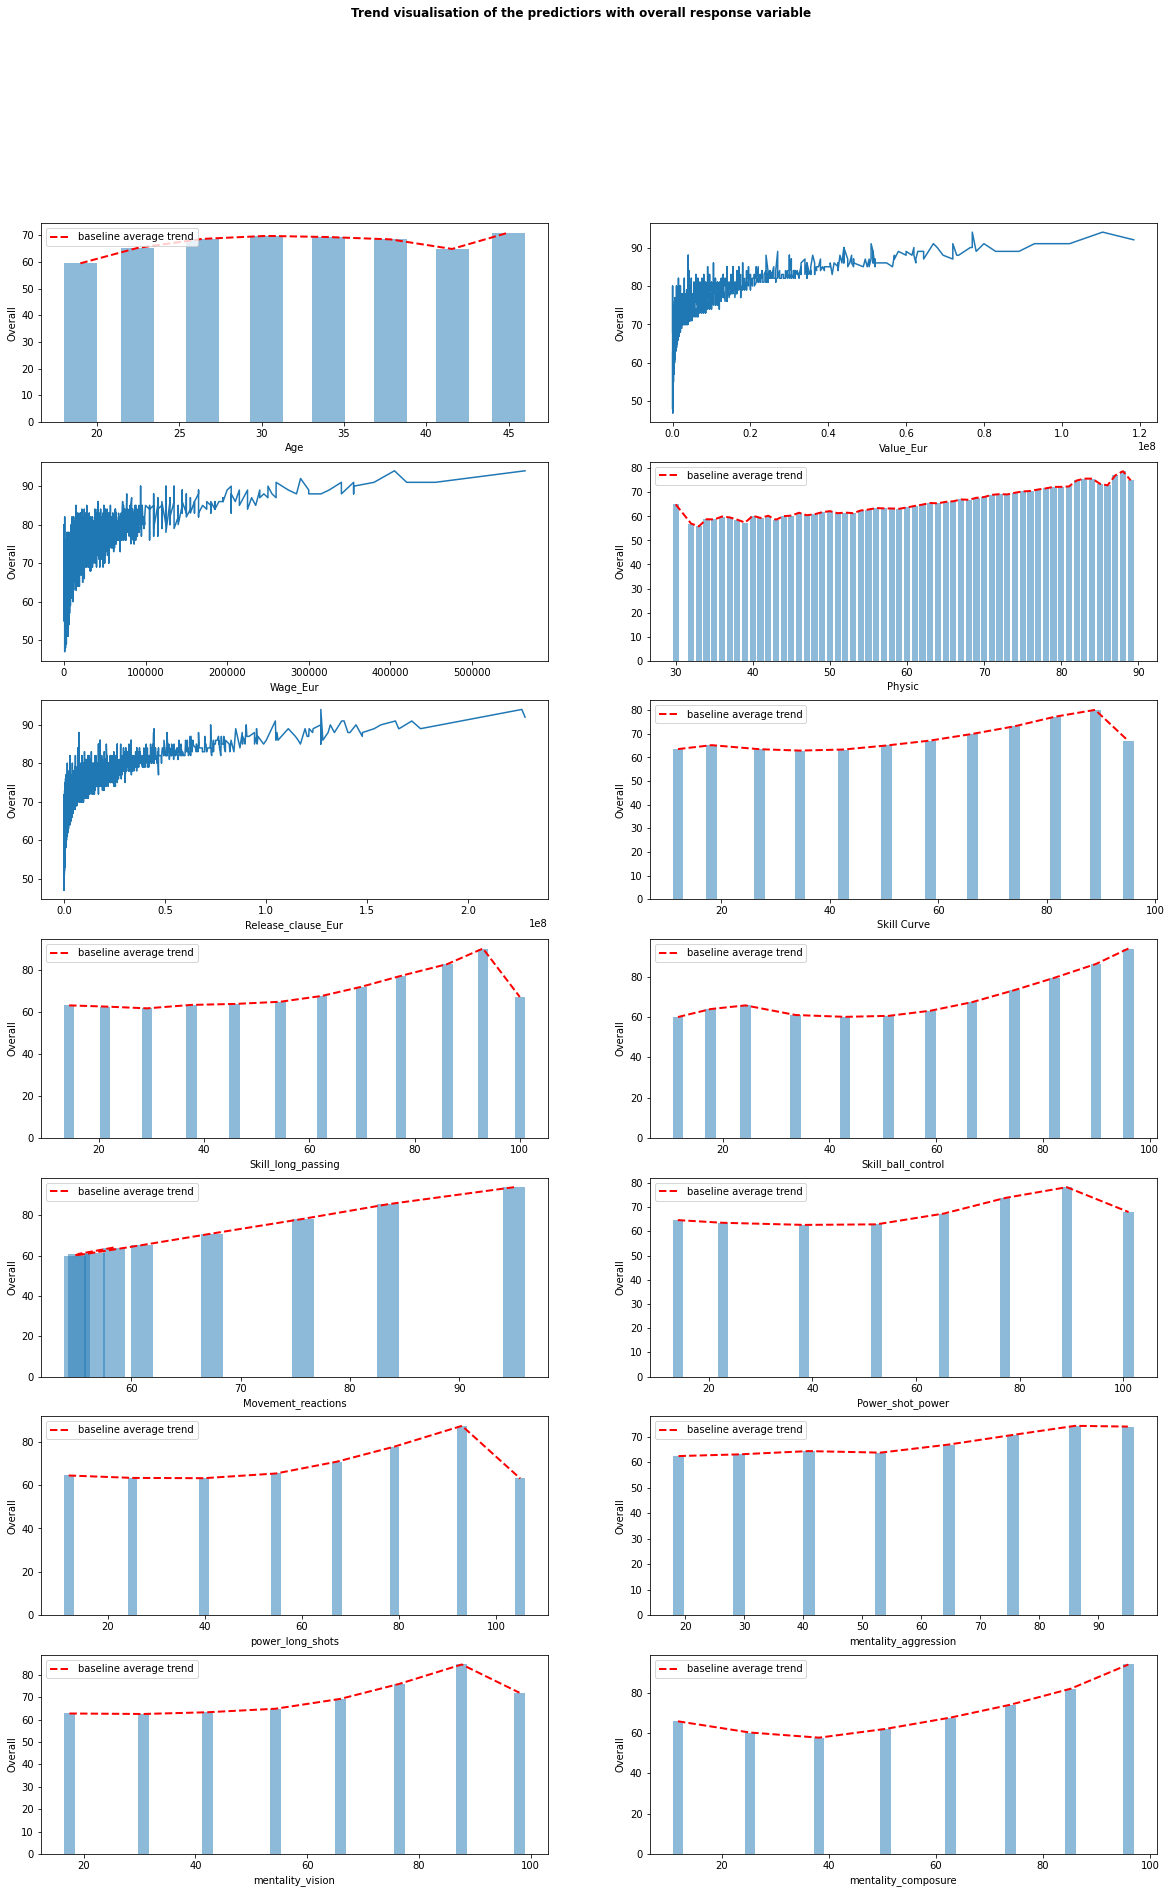

In [ ]:

# Visual analysis through graphs of the feature columns processed so far


fig, ax = plt.subplots(7,2,figsize=(20,30))
ax =ax.ravel()
#Relationship with age

age_bins = np.linspace(df19["age"].min(), df19["age"].max(), 8)
age_group = df19.groupby(by=np.digitize(df19["age"], age_bins)).mean()
ax[0].plot(age_group['age'], age_group['overall'], 'r--', linewidth=2, label='baseline average trend')
ax[0].bar(age_group['age'], age_group['overall'],width = 2, alpha=0.5)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Overall')
ax[0].legend(frameon=True, loc='topright')

#Relationship with value_eur
idx = np.argsort(df19.value_eur.values)
values = df19.value_eur[idx].values
overall = df19.overall[idx].values
ax[1].plot(values, overall)
ax[1].set_xlabel('Value_Eur')
ax[1].set_ylabel('Overall')


#Relationship with wage eur
idx = np.argsort(df19.wage_eur.values)
wage = df19.wage_eur[idx].values
overall = df19.overall[idx].values
ax[2].plot(wage, overall)
ax[2].set_xlabel('Wage_Eur')
ax[2].set_ylabel('Overall')


#Relationship with physic
df_foot = df19[["physic", "overall"]].groupby(by="physic").mean()
ax[3].plot(df_foot.index,df_foot, 'r--', linewidth=2, label='baseline average trend')
ax[3].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[3].set_xlabel('Physic')
ax[3].set_ylabel('Overall')
ax[3].legend(frameon=True, loc='topright')

#Relationship with release_clause_eur
idx = np.argsort(df19.release_clause_eur.values)
wage = df19.release_clause_eur[idx].values
overall = df19.overall[idx].values
ax[4].plot(wage, overall)
ax[4].set_xlabel('Release_clause_Eur')
ax[4].set_ylabel('Overall')

#Relationship with skill_curve
skill_bins = np.linspace(df19["skill_curve"].min(), df19["skill_curve"].max(), 12)
skill_group = df19.groupby(by=np.digitize(df19["skill_curve"], skill_bins)).mean()
ax[5].plot(skill_group['skill_curve'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[5].bar(skill_group['skill_curve'], skill_group['overall'],width = 2, alpha=0.5)
ax[5].set_xlabel('Skill Curve')
ax[5].set_ylabel('Overall')
ax[5].legend(frameon=True, loc='topright')

#Relationship with skill_long_passing
skill_bins = np.linspace(df19["skill_long_passing"].min(), df19["skill_long_passing"].max(), 12)
skill_group = df19.groupby(by=np.digitize(df19["skill_long_passing"], skill_bins)).mean()
ax[6].plot(skill_group['skill_long_passing'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[6].bar(skill_group['skill_long_passing'], skill_group['overall'],width = 2, alpha=0.5)
ax[6].set_xlabel('Skill_long_passing')
ax[6].set_ylabel('Overall')
ax[6].legend(frameon=True, loc='topright')

#Relationship with skill_ball_control
skill_bins = np.linspace(df19["skill_ball_control"].min(), df19["skill_ball_control"].max(), 12)
skill_group = df19.groupby(by=np.digitize(df19["skill_ball_control"], skill_bins)).mean()
ax[7].plot(skill_group['skill_ball_control'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[7].bar(skill_group['skill_ball_control'], skill_group['overall'],width = 2, alpha=0.5)
ax[7].set_xlabel('Skill_ball_control')
ax[7].set_ylabel('Overall')
ax[7].legend(frameon=True, loc='topright')

#Relationship with movement_reactions
skill_bins = np.linspace(df19["movement_reactions"].min(), df19["movement_reactions"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["skill_ball_control"], skill_bins)).mean()
ax[8].plot(skill_group['movement_reactions'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[8].bar(skill_group['movement_reactions'], skill_group['overall'],width = 2, alpha=0.5)
ax[8].set_xlabel('Movement_reactions')
ax[8].set_ylabel('Overall')
ax[8].legend(frameon=True, loc='topright')

#Relationship with power_shot_power
skill_bins = np.linspace(df19["power_shot_power"].min(), df19["power_shot_power"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["power_shot_power"], skill_bins)).mean()
ax[9].plot(skill_group['power_shot_power'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[9].bar(skill_group['power_shot_power'], skill_group['overall'],width = 2, alpha=0.5)
ax[9].set_xlabel('Power_shot_power')
ax[9].set_ylabel('Overall')
ax[9].legend(frameon=True, loc='topright')

#Relationship with power_long_shots
skill_bins = np.linspace(df19["power_long_shots"].min(), df19["power_long_shots"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["power_long_shots"], skill_bins)).mean()
ax[10].plot(skill_group['power_long_shots'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[10].bar(skill_group['power_long_shots'], skill_group['overall'],width = 2, alpha=0.5)
ax[10].set_xlabel('power_long_shots')
ax[10].set_ylabel('Overall')
ax[10].legend(frameon=True, loc='topright')

#Relationship with mentality_aggression
skill_bins = np.linspace(df19["mentality_aggression"].min(), df19["mentality_aggression"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["mentality_aggression"], skill_bins)).mean()
ax[11].plot(skill_group['mentality_aggression'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[11].bar(skill_group['mentality_aggression'], skill_group['overall'],width = 2, alpha=0.5)
ax[11].set_xlabel('mentality_aggression')
ax[11].set_ylabel('Overall')
ax[11].legend(frameon=True, loc='topright')

#Relationship with mentality_vision
skill_bins = np.linspace(df19["mentality_vision"].min(), df19["mentality_vision"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["mentality_vision"], skill_bins)).mean()
ax[12].plot(skill_group['mentality_vision'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[12].bar(skill_group['mentality_vision'], skill_group['overall'],width = 2, alpha=0.5)
ax[12].set_xlabel('mentality_vision')
ax[12].set_ylabel('Overall')
ax[12].legend(frameon=True, loc='topright')

#Relationship with mentality_composure
skill_bins = np.linspace(df19["mentality_composure"].min(), df19["mentality_composure"].max(), 8)
skill_group = df19.groupby(by=np.digitize(df19["mentality_composure"], skill_bins)).mean()
ax[13].plot(skill_group['mentality_composure'], skill_group['overall'], 'r--', linewidth=2,  label='baseline average trend')
ax[13].bar(skill_group['mentality_composure'], skill_group['overall'],width = 2, alpha=0.5)
ax[13].set_xlabel('mentality_composure')
ax[13].set_ylabel('Overall')
ax[13].legend(frameon=True, loc='topright')

fig.suptitle("Trend visualisation of the predictiors with overall response variable", fontweight='bold')


There are several $categorical$ variables in this dataframe which are as follows:
1. preferred_foot
2. international_reputation
3. weak_foot
4. skill_moves
5. contract_valid_until
6. team_jersey_number
7. nation_jersey_number
8. nationality 
9. club
10. Team position
  
Here, international_reputation, 
Let us try to visualise these features through graph before employing any type of encoding

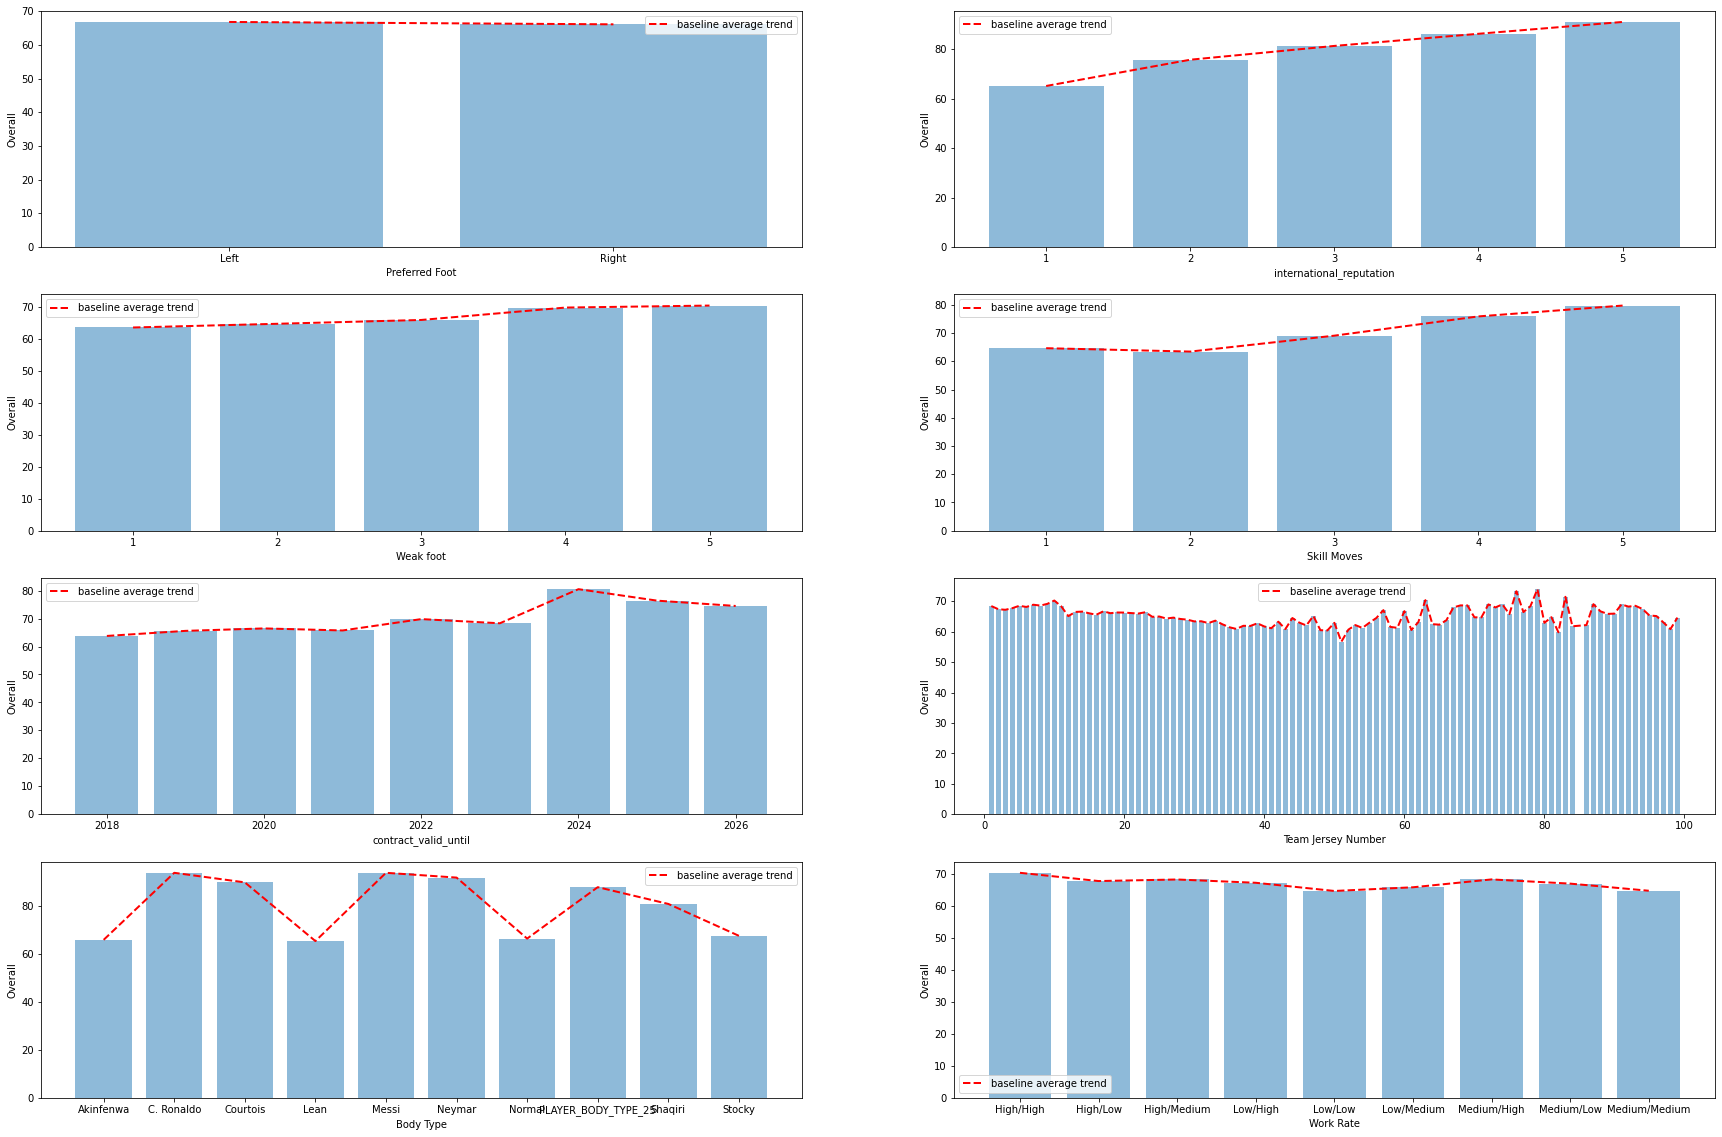

In [ ]:
fig, ax = plt.subplots(4,2,figsize=(30,20))
ax =ax.ravel()

#Relationship with preffered foot
df_foot = df19[["preferred_foot", "overall"]].groupby(by="preferred_foot").mean()
ax[0].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[0].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[0].set_xlabel('Preferred Foot')
ax[0].set_ylabel('Overall')
ax[0].legend(frameon=True, loc='topleft')

#Relationship with international reputation
df_foot = df19[["international_reputation", "overall"]].groupby(by="international_reputation").mean()
ax[1].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[1].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[1].set_xlabel('international_reputation')
ax[1].set_ylabel('Overall')
ax[1].legend(frameon=True, loc='topleft')

#Relationship with weak foot
df_foot = df19[["weak_foot", "overall"]].groupby(by="weak_foot").mean()
ax[2].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[2].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[2].set_xlabel('Weak foot')
ax[2].set_ylabel('Overall')
ax[2].legend(frameon=True, loc='topleft')

#Relationship with skill moves
df_foot = df19[["skill_moves", "overall"]].groupby(by="skill_moves").mean()
ax[3].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[3].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[3].set_xlabel('Skill Moves')
ax[3].set_ylabel('Overall')
ax[3].legend(frameon=True, loc='topleft')

#Relationship with contract_valid_until
df_foot = df19[["contract_valid_until", "overall"]].groupby(by="contract_valid_until").mean()
ax[4].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[4].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[4].set_xlabel('contract_valid_until')
ax[4].set_ylabel('Overall')
ax[4].legend(frameon=True, loc='topleft')

#Relationship with team jersey number
df_foot = df19[["team_jersey_number", "overall"]].groupby(by="team_jersey_number").mean()
ax[5].plot(df_foot.index,df_foot, 'r--', linewidth=2,  label='baseline average trend')
ax[5].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[5].set_xlabel('Team Jersey Number')
ax[5].set_ylabel('Overall')
ax[5].legend(frameon=True, loc='topleft')


#Relationship with body type
df_foot = df19[["body_type", "overall"]].groupby(by="body_type").mean()
ax[6].plot(df_foot.index,df_foot, 'r--', linewidth=2, label='baseline average trend')
ax[6].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[6].set_xlabel('Body Type')
ax[6].set_ylabel('Overall')
ax[6].legend(frameon=True, loc='topleft')


#Relationship with work_rate
df_foot = df19[["work_rate", "overall"]].groupby(by="work_rate").mean()
ax[7].plot(df_foot.index,df_foot, 'r--', linewidth=2, label='baseline average trend')
ax[7].bar(df_foot.index,df_foot['overall'], alpha=0.5)
ax[7].set_xlabel('Work Rate')
ax[7].set_ylabel('Overall')
ax[7].legend(frameon=True, loc='topleft')



<BarContainer object of 17770 artists>

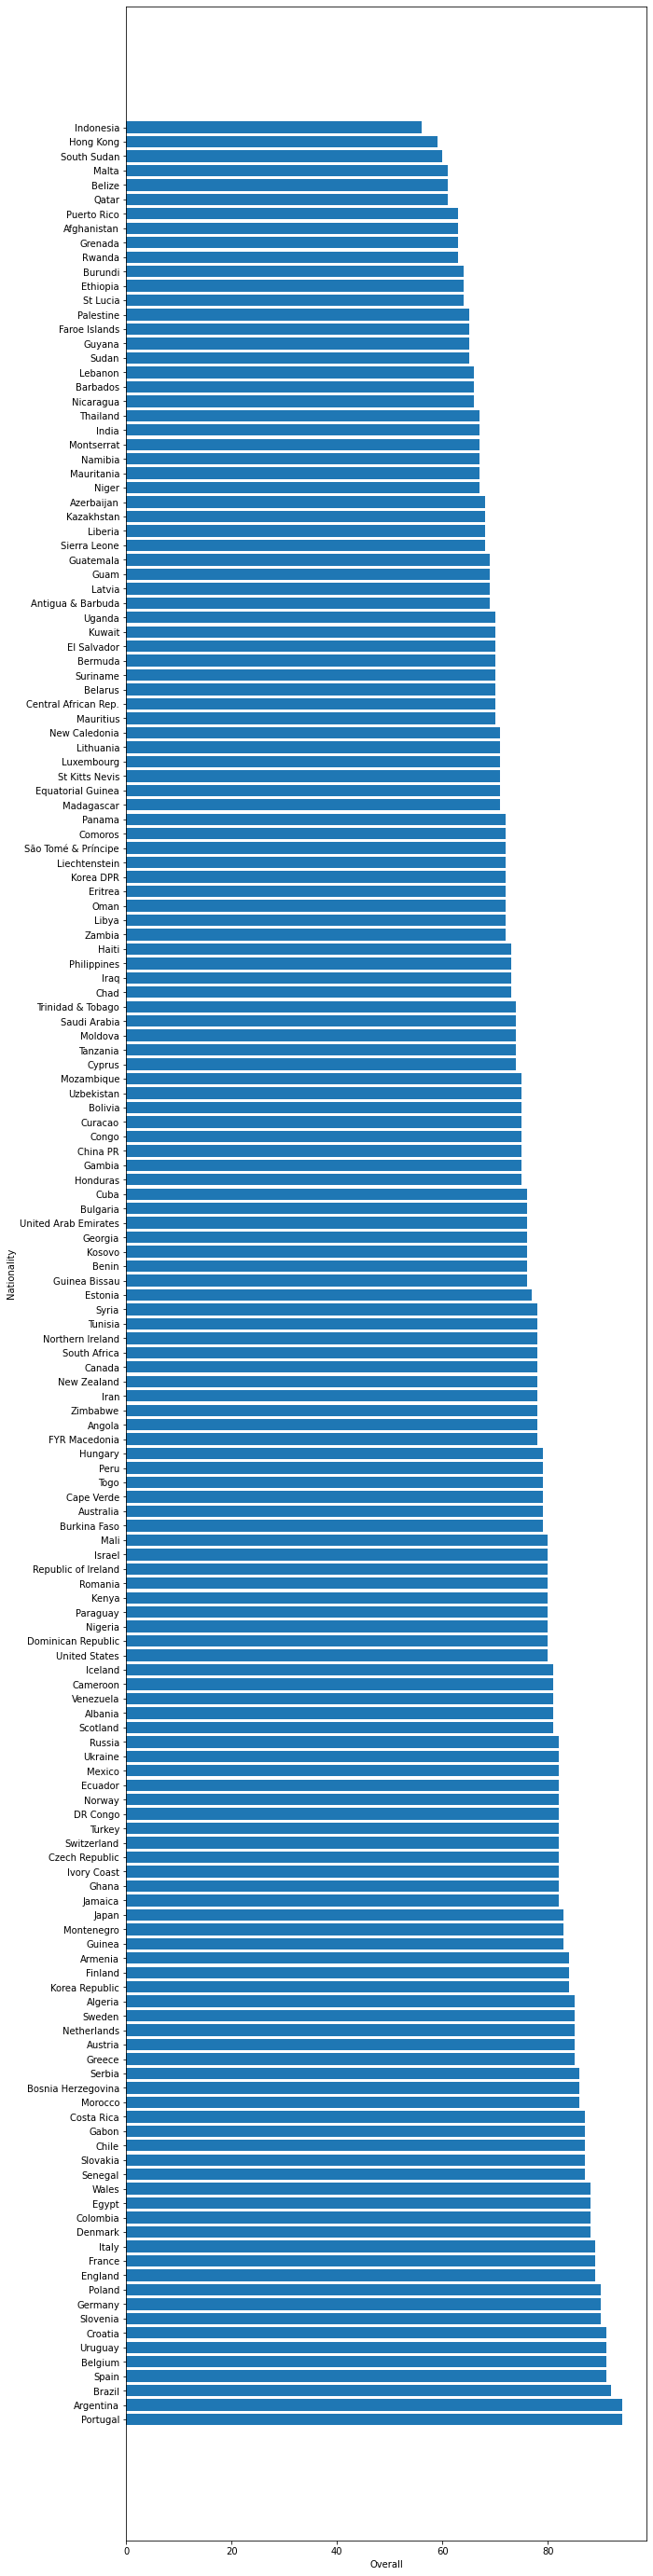

In [ ]:
#Relationship with nationality
fig, ax = plt.subplots(figsize=(10,50))
ax.set_xlabel('Overall')
ax.set_ylabel('Nationality')
ax.barh(df19["nationality"],df19['overall'] )

Out of all categorical feature columns, following shows some relationship trend with the overall response variable:

1. Nationality
2. International Reputation
3. Weak Foot
4. Skill Moves
5. Contract Valid Until
6. Body Type
7. Work Rate

where, there is need to one-hot encode columns like Nationality, Contract Valid Until, Body Type and Work Rate

Selected Feature columns based on the EDA done in previous sections are following:

1.   Age
2.   Value_eur
3.   Wage_eur
4.   Release_clause_eur
5.   International Reputation
6.   Weak Foot
7.   Skill Moves
8.   Contract Valid Until
9.   Nationality
10.  Body Type
11.  Work Rate
12.  skill_curve
13.  skill_long_passing
14.  skill_ball_control
15.  movement_reactions
16.  power_shot_power
17.  power_long_shots
18.  mentality_aggression
19.  mentality_vision
20.  mentality_composure
21.  attacking_short_passing
22.  Team position

*We have not taken $club$ as a predictor since in the test set we are asked to take players from specific clubs only, so it does not make sense to choose this as a predictor during training*



In [ ]:
# For training set

df19_new = df19[["age","value_eur","wage_eur","release_clause_eur","international_reputation","weak_foot","skill_moves",\
                 "work_rate","contract_valid_until","nationality","body_type",\
                 "skill_curve","skill_long_passing","skill_ball_control","movement_reactions","power_shot_power",\
                 "power_long_shots","mentality_aggression","mentality_vision","mentality_composure", "attacking_short_passing","team_position", "overall"]]
cat_features = ["body_type", "team_position", "nationality", "contract_valid_until","work_rate"]


for key in cat_features:
        temp_col = pd.get_dummies(df19_new[key])
        df19_new.drop(key,axis=1, inplace=True)
        df19_new = pd.concat([df19_new, temp_col], axis=1)
     

#Filling null values with zero
df19_new["release_clause_eur"].fillna(0.0, inplace=True)
df19_new.head()

age  value_eur  wage_eur  release_clause_eur  international_reputation  \
0   33   77000000    405000         127100000.0                         5   
1   31  110500000    565000         226500000.0                         5   
2   26  118500000    290000         228100000.0                         5   
3   27   72000000    260000         138600000.0                         4   
4   27  102000000    355000         196400000.0                         4   

   weak_foot  skill_moves  skill_curve  skill_long_passing  \
0          4            5         81.0                77.0   
1          4            4         93.0                87.0   
2          5            5         88.0                78.0   
3          3            1         21.0                51.0   
4          5            4         85.0                91.0   

   skill_ball_control  movement_reactions  power_shot_power  power_long_shots  \
0                94.0                96.0              95.0              93.0   
1                96.0                95.0              85.0              94.0   
2                95.0                94.0              80.0              82.0   
3                42.0                90.0              31.0              12.0   
4                91.0                91.0              91.0              91.0   

   mentality_aggression  mentality_vision  mentality_composure  \
0                  63.0              82.0                 95.0   
1                  48.0              94.0                 96.0   
2                  56.0              87.0                 94.0   
3                  38.0              68.0                 68.0   
4                  76.0              94.0                 88.0   

   attacking_short_passing  overall  Akinfenwa  C. Ronaldo  Courtois  Lean  \
0                     81.0       94          0           1         0     0   
1                     90.0       94          0           0         0     0   
2                     84.0       92          0           0         0     0   
3                     50.0       91          0           0         0     1   
4                     92.0       91          0           0         0     0   

   Messi  Neymar  Normal  PLAYER_BODY_TYPE_25  Shaqiri  Stocky  CAM  CB  CDM  \
0      0       0       0                    0        0       0    0   0    0   
1      1       0       0                    0        0       0    0   0    0   
2      0       1       0                    0        0       0    1   0    0   
3      0       0       0                    0        0       0    0   0    0   
4      0       0       1                    0        0       0    0   0    0   

   CF  CM  GK  LAM  LB  LCB  LCM  LDM  LF  LM  LS  LW  LWB  RAM  RB  RCB  RCM  \
0   0   0   0    0   0    0    0    0   0   0   0   1    0    0   0    0    0   
1   0   0   0    0   0    0    0    0   0   0   0   0    0    0   0    0    0   
2   0   0   0    0   0    0    0    0   0   0   0   0    0    0   0    0    0   
3   0   0   1    0   0    0    0    0   0   0   0   0    0    0   0    0    0   
4   0   0   0    0   0    0    0    0   0   0   0   0    0    0   0    0    1   

   RDM  RES  RF  RM  RS  RW  RWB  ST  SUB  Afghanistan  Albania  Algeria  \
0    0    0   0   0   0   0    0   0    0            0        0        0   
1    0    0   0   0   0   1    0   0    0            0        0        0   
2    0    0   0   0   0   0    0   0    0            0        0        0   
3    0    0   0   0   0   0    0   0    0            0        0        0   
4    0    0   0   0   0   0    0   0    0            0        0        0   

   Angola  Antigua & Barbuda  Argentina  Armenia  Australia  Austria  \
0       0                  0          0        0          0        0   
1       0                  0          1        0          0        0   
2       0                  0          0        0          0        0   
3       0                  0          0        0          0        0   
4       0                  0 

For testing set, we are asked to take players from these specific clubs only:

1. FC Barcelona

2. FC Bayern München

3. Real Madrid 

4. Paris Saint-Germain

5. Juventus

6. Manchester City

7. Liverpool FC

In [ ]:
#Filtering dataframe based on club values
df20_new = df20.loc[df20['club'].isin(["FC Barcelona","FC Bayern München","Real Madrid","Paris Saint-Germain","Juventus","Manchester City","Liverpool FC"])]
df20_new.reset_index(inplace=True)
df20_new.head()

index  sofifa_id                                         player_url  \
0      0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2      2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3      4     183277  https://sofifa.com/player/183277/eden-hazard/2...   
4      5     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3          E. Hazard                          Eden Hazard   28  1991-01-07   
4       K. De Bruyne                      Kevin De Bruyne   28  1991-06-28   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        175         74     Belgium          Real Madrid       91         91   
4        181         70     Belgium      Manchester City       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   90000000    470000           LW, CF          Right   
4   90000000    370000          CAM, CM          Right   

   international_reputation  weak_foot  skill_moves    work_rate   body_type  \
0                         5          4            4   Medium/Low       Messi   
1                         5          4            5     High/Low  C. Ronaldo   
2                         5          5            5  High/Medium      Neymar   
3                         4          4            4  High/Medium      Normal   
4                         4          5            4    High/High      Normal   

  real_face  release_clause_eur  \
0       Yes         195800000.0   
1       Yes          96500000.0   
2       Yes         195200000.0   
3       Yes         184500000.0   
4       Yes         166500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                    #Speedster, #Dribbler, #Acrobat            LW   
4  #Dribbler, #Playmaker  , #Engine, #Distance Sh...           RCM   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                 7.0         NaN  2019-07-01                2024.0   
4                17.0         NaN  2015-08-30                2023.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              LF                  10.0  91.0      83.0     86.0       94.0   
4             RCM                   7.0  76.0      86.0     92.0       86.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0     

Graphically representing the Overall data for the players in test set

Text(0, 0.5, 'Players')

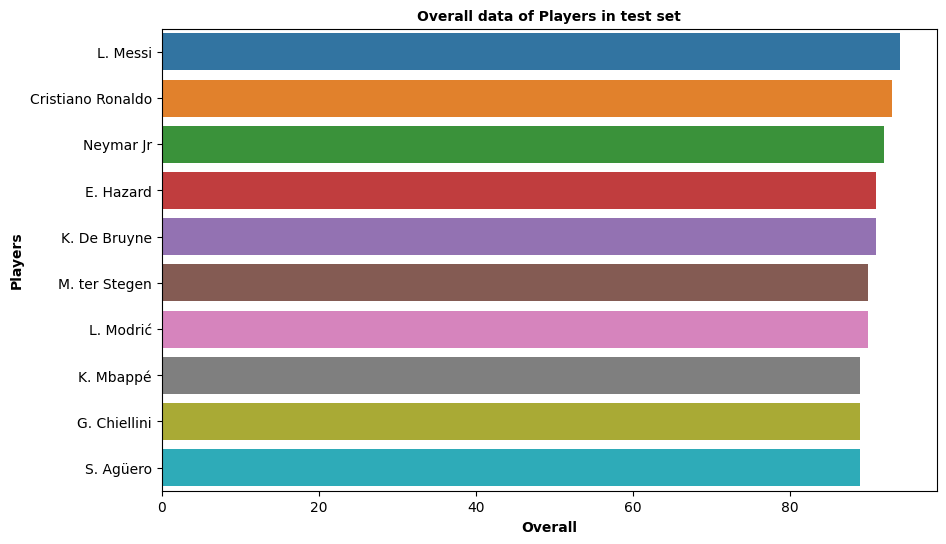

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
x = df20_new['short_name'][:10]
y = df20_new['overall'][:10]
ax =sns.barplot(y,x)
plt.title("Overall data of Players in test set", fontweight='bold', fontsize='10')
plt.xlabel("Overall", fontweight='bold', fontsize='10')
plt.ylabel("Players", fontweight='bold', fontsize='10')

In [ ]:

df20_new = df20_new[["age","value_eur","wage_eur","release_clause_eur","international_reputation","weak_foot","skill_moves",\
                 "work_rate","contract_valid_until","nationality","body_type",\
                 "skill_curve","skill_long_passing","skill_ball_control","movement_reactions","power_shot_power",\
                 "power_long_shots","mentality_aggression","mentality_vision","mentality_composure", "attacking_short_passing","team_position","player_positions", "overall"]]

In [ ]:
#Checking data types of all selected feature columns
df20_new.dtypes

age                           int64
value_eur                     int64
wage_eur                      int64
release_clause_eur          float64
international_reputation      int64
weak_foot                     int64
skill_moves                   int64
work_rate                    object
contract_valid_until        float64
nationality                  object
body_type                    object
skill_curve                   int64
skill_long_passing            int64
skill_ball_control            int64
movement_reactions            int64
power_shot_power              int64
power_long_shots              int64
mentality_aggression          int64
mentality_vision              int64
mentality_composure           int64
attacking_short_passing       int64
team_position                object
player_positions             object
overall                       int64
dtype: object

From the above step, we found out that work_rate, nationality, body_type and team_position  are categorical variables, same as players19 dataset

In [ ]:
#Checking null values count
df20_new.isnull().sum()

age                         0
value_eur                   0
wage_eur                    0
release_clause_eur          3
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
contract_valid_until        0
nationality                 0
body_type                   0
skill_curve                 0
skill_long_passing          0
skill_ball_control          0
movement_reactions          0
power_shot_power            0
power_long_shots            0
mentality_aggression        0
mentality_vision            0
mentality_composure         0
attacking_short_passing     0
team_position               0
player_positions            0
overall                     0
dtype: int64

The release_clause_eur column needs to be filled with zero values for NA

In [ ]:
#Filling null values with zero
df20_new["release_clause_eur"].fillna(0.0, inplace=True)

In [ ]:
# Encoding player position column

df = df20_new['player_positions'].str.get_dummies(sep = ', ').add_prefix('P_')
df.head()

P_CAM  P_CB  P_CDM  P_CF  P_CM  P_GK  P_LB  P_LM  P_LW  P_LWB  P_RB  P_RM  \
0      0     0      0     1     0     0     0     0     0      0     0     0   
1      0     0      0     0     0     0     0     0     1      0     0     0   
2      1     0      0     0     0     0     0     0     1      0     0     0   
3      0     0      0     1     0     0     0     0     1      0     0     0   
4      1     0      0     0     1     0     0     0     0      0     0     0   

   P_RW  P_RWB  P_ST  
0     1      0     1  
1     0      0     1  
2     0      0     0  
3     0      0     0  
4     0      0     0

In [ ]:
# Filling the na values with 0
df.fillna(0, inplace=True) 


 #Concatenating player positions dataframe with the original one
df20_new = pd.concat([df20_new, df], axis=1)
# Dropping player position column 
df20_new.drop(columns=["player_positions"], inplace=True)
df20_new.head()

age  value_eur  wage_eur  release_clause_eur  international_reputation  \
0   32   95500000    565000         195800000.0                         5   
1   34   58500000    405000          96500000.0                         5   
2   27  105500000    290000         195200000.0                         5   
3   28   90000000    470000         184500000.0                         4   
4   28   90000000    370000         166500000.0                         4   

   weak_foot  skill_moves    work_rate  contract_valid_until nationality  \
0          4            4   Medium/Low                2021.0   Argentina   
1          4            5     High/Low                2022.0    Portugal   
2          5            5  High/Medium                2022.0      Brazil   
3          4            4  High/Medium                2024.0     Belgium   
4          5            4    High/High                2023.0     Belgium   

    body_type  skill_curve  skill_long_passing  skill_ball_control  \
0       Messi           93                  92                  96   
1  C. Ronaldo           81                  77                  92   
2      Neymar           88                  81                  95   
3      Normal           83                  83                  94   
4      Normal           85                  91                  91   

   movement_reactions  power_shot_power  power_long_shots  \
0                  95                86                94   
1                  96                95                93   
2                  92                80                84   
3                  90                82                80   
4                  91                91                90   

   mentality_aggression  mentality_vision  mentality_composure  \
0                    48                94                   96   
1                    63                82                   95   
2                    51                90                   94   
3                    54                89                   91   
4                    76                94                   91   

   attacking_short_passing team_position  overall  P_CAM  P_CB  P_CDM  P_CF  \
0                       92            RW       94      0     0      0     1   
1                       83            LW       93      0     0      0     0   
2                       87           CAM       92      1     0      0     0   
3                       89            LW       91      0     0      0     1   
4                       92           RCM       91      1     0      0     0   

   P_CM  P_GK  P_LB  P_LM  P_LW  P_LWB  P_RB  P_RM  P_RW  P_RWB  P_ST  
0     0     0     0     0     0      0     0     0     1      0     1  
1     0     0     0     0     1      0     0     0     0      0     1  
2     0     0     0     0     1      0     0     0     0      0     0  
3     0     0     0     0     1      0     0     0     0      0     0  
4     1     0     0     0     0      0     0     0     0      0     0

In [ ]:
# For testing set

cat_features = ["body_type", "team_position", "nationality", "contract_valid_until","work_rate"]

# One-hot encoding categorical columns
for key in cat_features:
     
        temp_col = pd.get_dummies(df20_new[key])
        df20_new.drop(key,axis=1, inplace=True)
        df20_new = pd.concat([df20_new, temp_col], axis=1)
      
df20_new.head()

age  value_eur  wage_eur  release_clause_eur  international_reputation  \
0   32   95500000    565000         195800000.0                         5   
1   34   58500000    405000          96500000.0                         5   
2   27  105500000    290000         195200000.0                         5   
3   28   90000000    470000         184500000.0                         4   
4   28   90000000    370000         166500000.0                         4   

   weak_foot  skill_moves  skill_curve  skill_long_passing  \
0          4            4           93                  92   
1          4            5           81                  77   
2          5            5           88                  81   
3          4            4           83                  83   
4          5            4           85                  91   

   skill_ball_control  movement_reactions  power_shot_power  power_long_shots  \
0                  96                  95                86                94   
1                  92                  96                95                93   
2                  95                  92                80                84   
3                  94                  90                82                80   
4                  91                  91                91                90   

   mentality_aggression  mentality_vision  mentality_composure  \
0                    48                94                   96   
1                    63                82                   95   
2                    51                90                   94   
3                    54                89                   91   
4                    76                94                   91   

   attacking_short_passing  overall  P_CAM  P_CB  P_CDM  P_CF  P_CM  P_GK  \
0                       92       94      0     0      0     1     0     0   
1                       83       93      0     0      0     0     0     0   
2                       87       92      1     0      0     0     0     0   
3                       89       91      0     0      0     1     0     0   
4                       92       91      1     0      0     0     1     0   

   P_LB  P_LM  P_LW  P_LWB  P_RB  P_RM  P_RW  P_RWB  P_ST  C. Ronaldo  \
0     0     0     0      0     0     0     1      0     1           0   
1     0     0     1      0     0     0     0      0     1           1   
2     0     0     1      0     0     0     0      0     0           0   
3     0     0     1      0     0     0     0      0     0           0   
4     0     0     0      0     0     0     0      0     0           0   

   Courtois  Lean  Messi  Neymar  Normal  Stocky  CAM  CDM  CF  GK  LB  LCB  \
0         0     0      1       0       0       0    0    0   0   0   0    0   
1         0     0      0       0       0       0    0    0   0   0   0    0   
2         0     0      0       1       0       0    1    0   0   0   0    0   
3         0     0      0       0       1       0    0    0   0   0   0    0   
4         0     0      0       0       1       0    0    0   0   0   0    0   

   LCM  LW  RB  RCB  RCM  RES  RW  ST  SUB  Algeria  Argentina  Austria  \
0    0   0   0    0    0    0   1   0    0        0          1        0   
1    0   1   0    0    0    0   0   0    0        0          0        0   
2    0   0   0    0    0    0   0   0    0        0          0        0   
3    0   1   0    0    0    0   0   0    0        0          0        0   
4    0   0   0    0    1    0   0   0    0        0          0        0   

   Belgium  Bosnia Herzegovina  Brazil  Cameroon  Canada  Chile  Colombia  \
0        0                   0       0         0       0      0         0   
1        0                   0       0         0       0      0         0   
2        0                   0       1         0       0      0         0   
3        1                   0       0         0       0      0         0   
4        1                   0       0         0       0      0       

After one-hot encoding, there must be columns that might not be present in both the datasets, so we are taking intersection of columns present in the datasets. We will be using these common feature columns for training and prediction

In [ ]:
#Number of intersecting columns
cols = list(set(df19_new.columns).intersection(set(df20_new.columns)))

In [ ]:
#Preparing training and testing dataset
df19_proc =df19_new[[i for i in cols]].copy()
df20_proc =df20_new[[i for i in cols]].copy()

x_train = df19_proc.drop(["overall"],axis=1)
y_train = df19_proc["overall"]

x_test = df20_proc.drop(["overall"],axis=1)
y_test = df20_proc["overall"]

In [ ]:
# Base Model
lreg = LinearRegression()

    # Fit the linear model on the train data
lreg.fit(x_train,y_train)
    
    # Predict the response variable for the test set using the trained model
y_pred= lreg.predict(x_test)
    
    # Compute the MSE for the test data
MSE = mean_squared_error(y_test, y_pred)
    
    # Append the computed MSE to the list
print(f'The mean squared error using Linear Regression is {MSE:.4f}')

The mean squared error using Linear Regression is 21.7322


The mean squared error using Decision Tree Regressor is 1.0773
The mean squared error using Random Forest Regressor is 0.6259


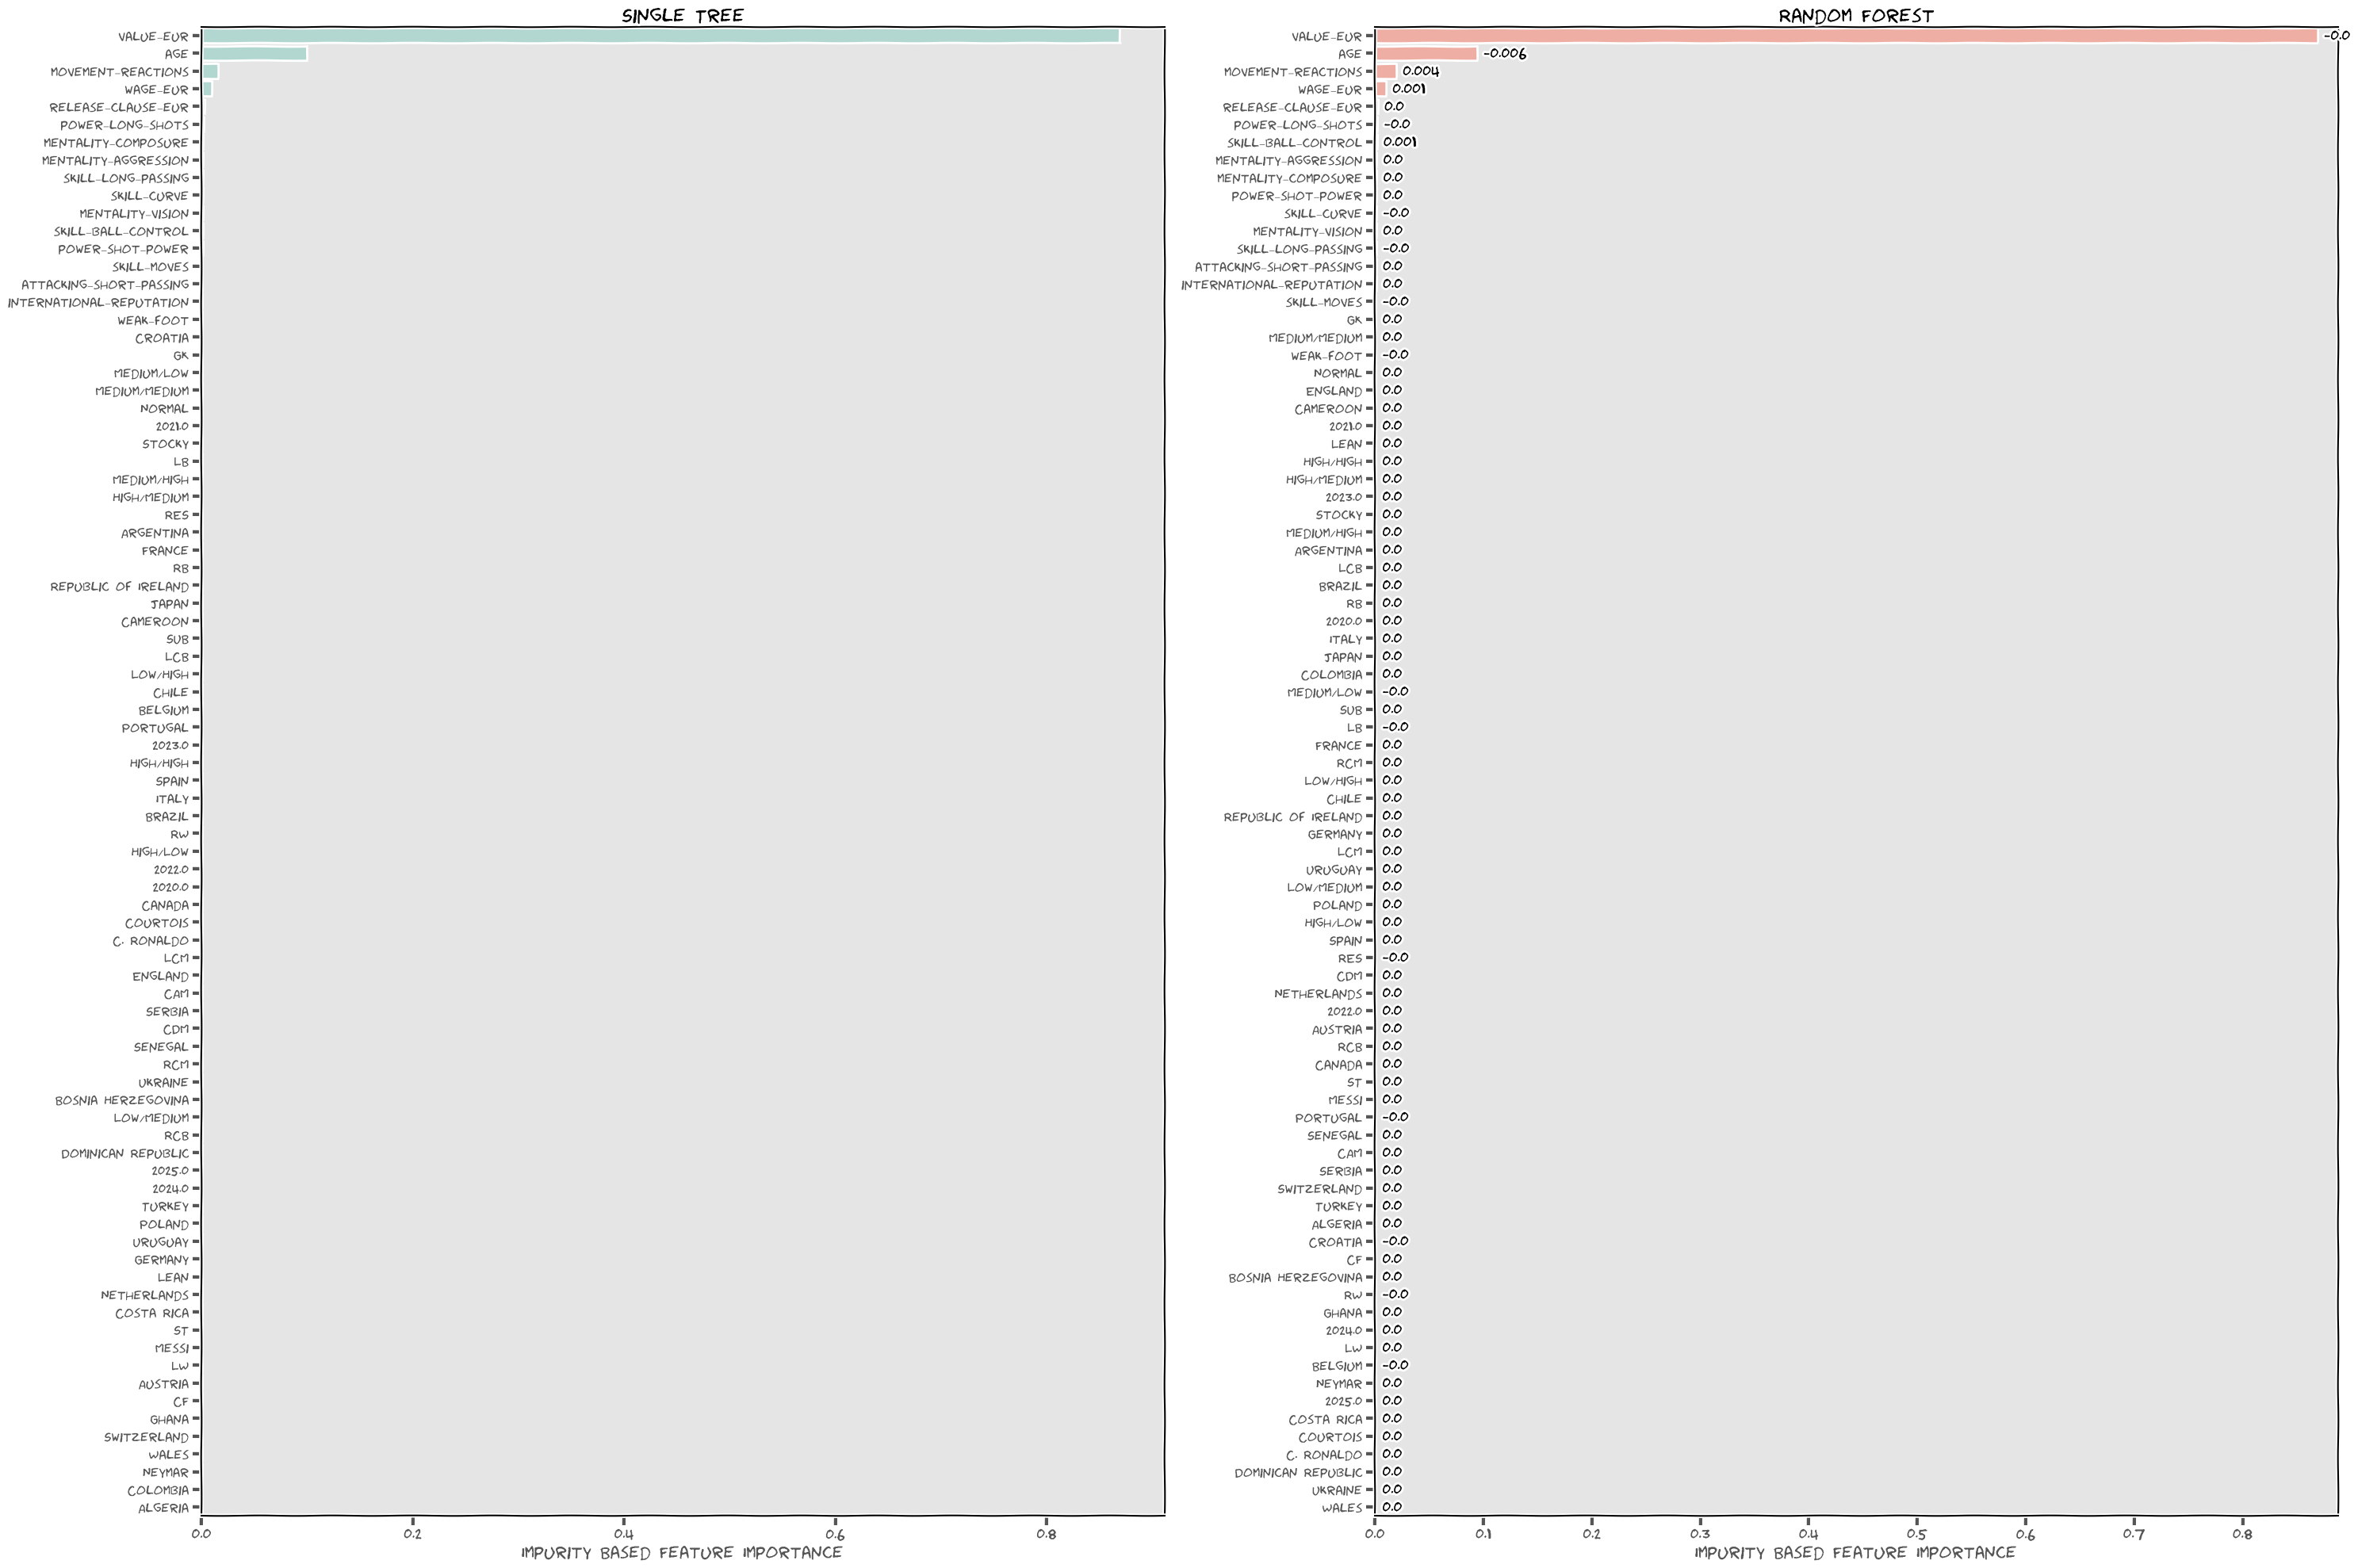

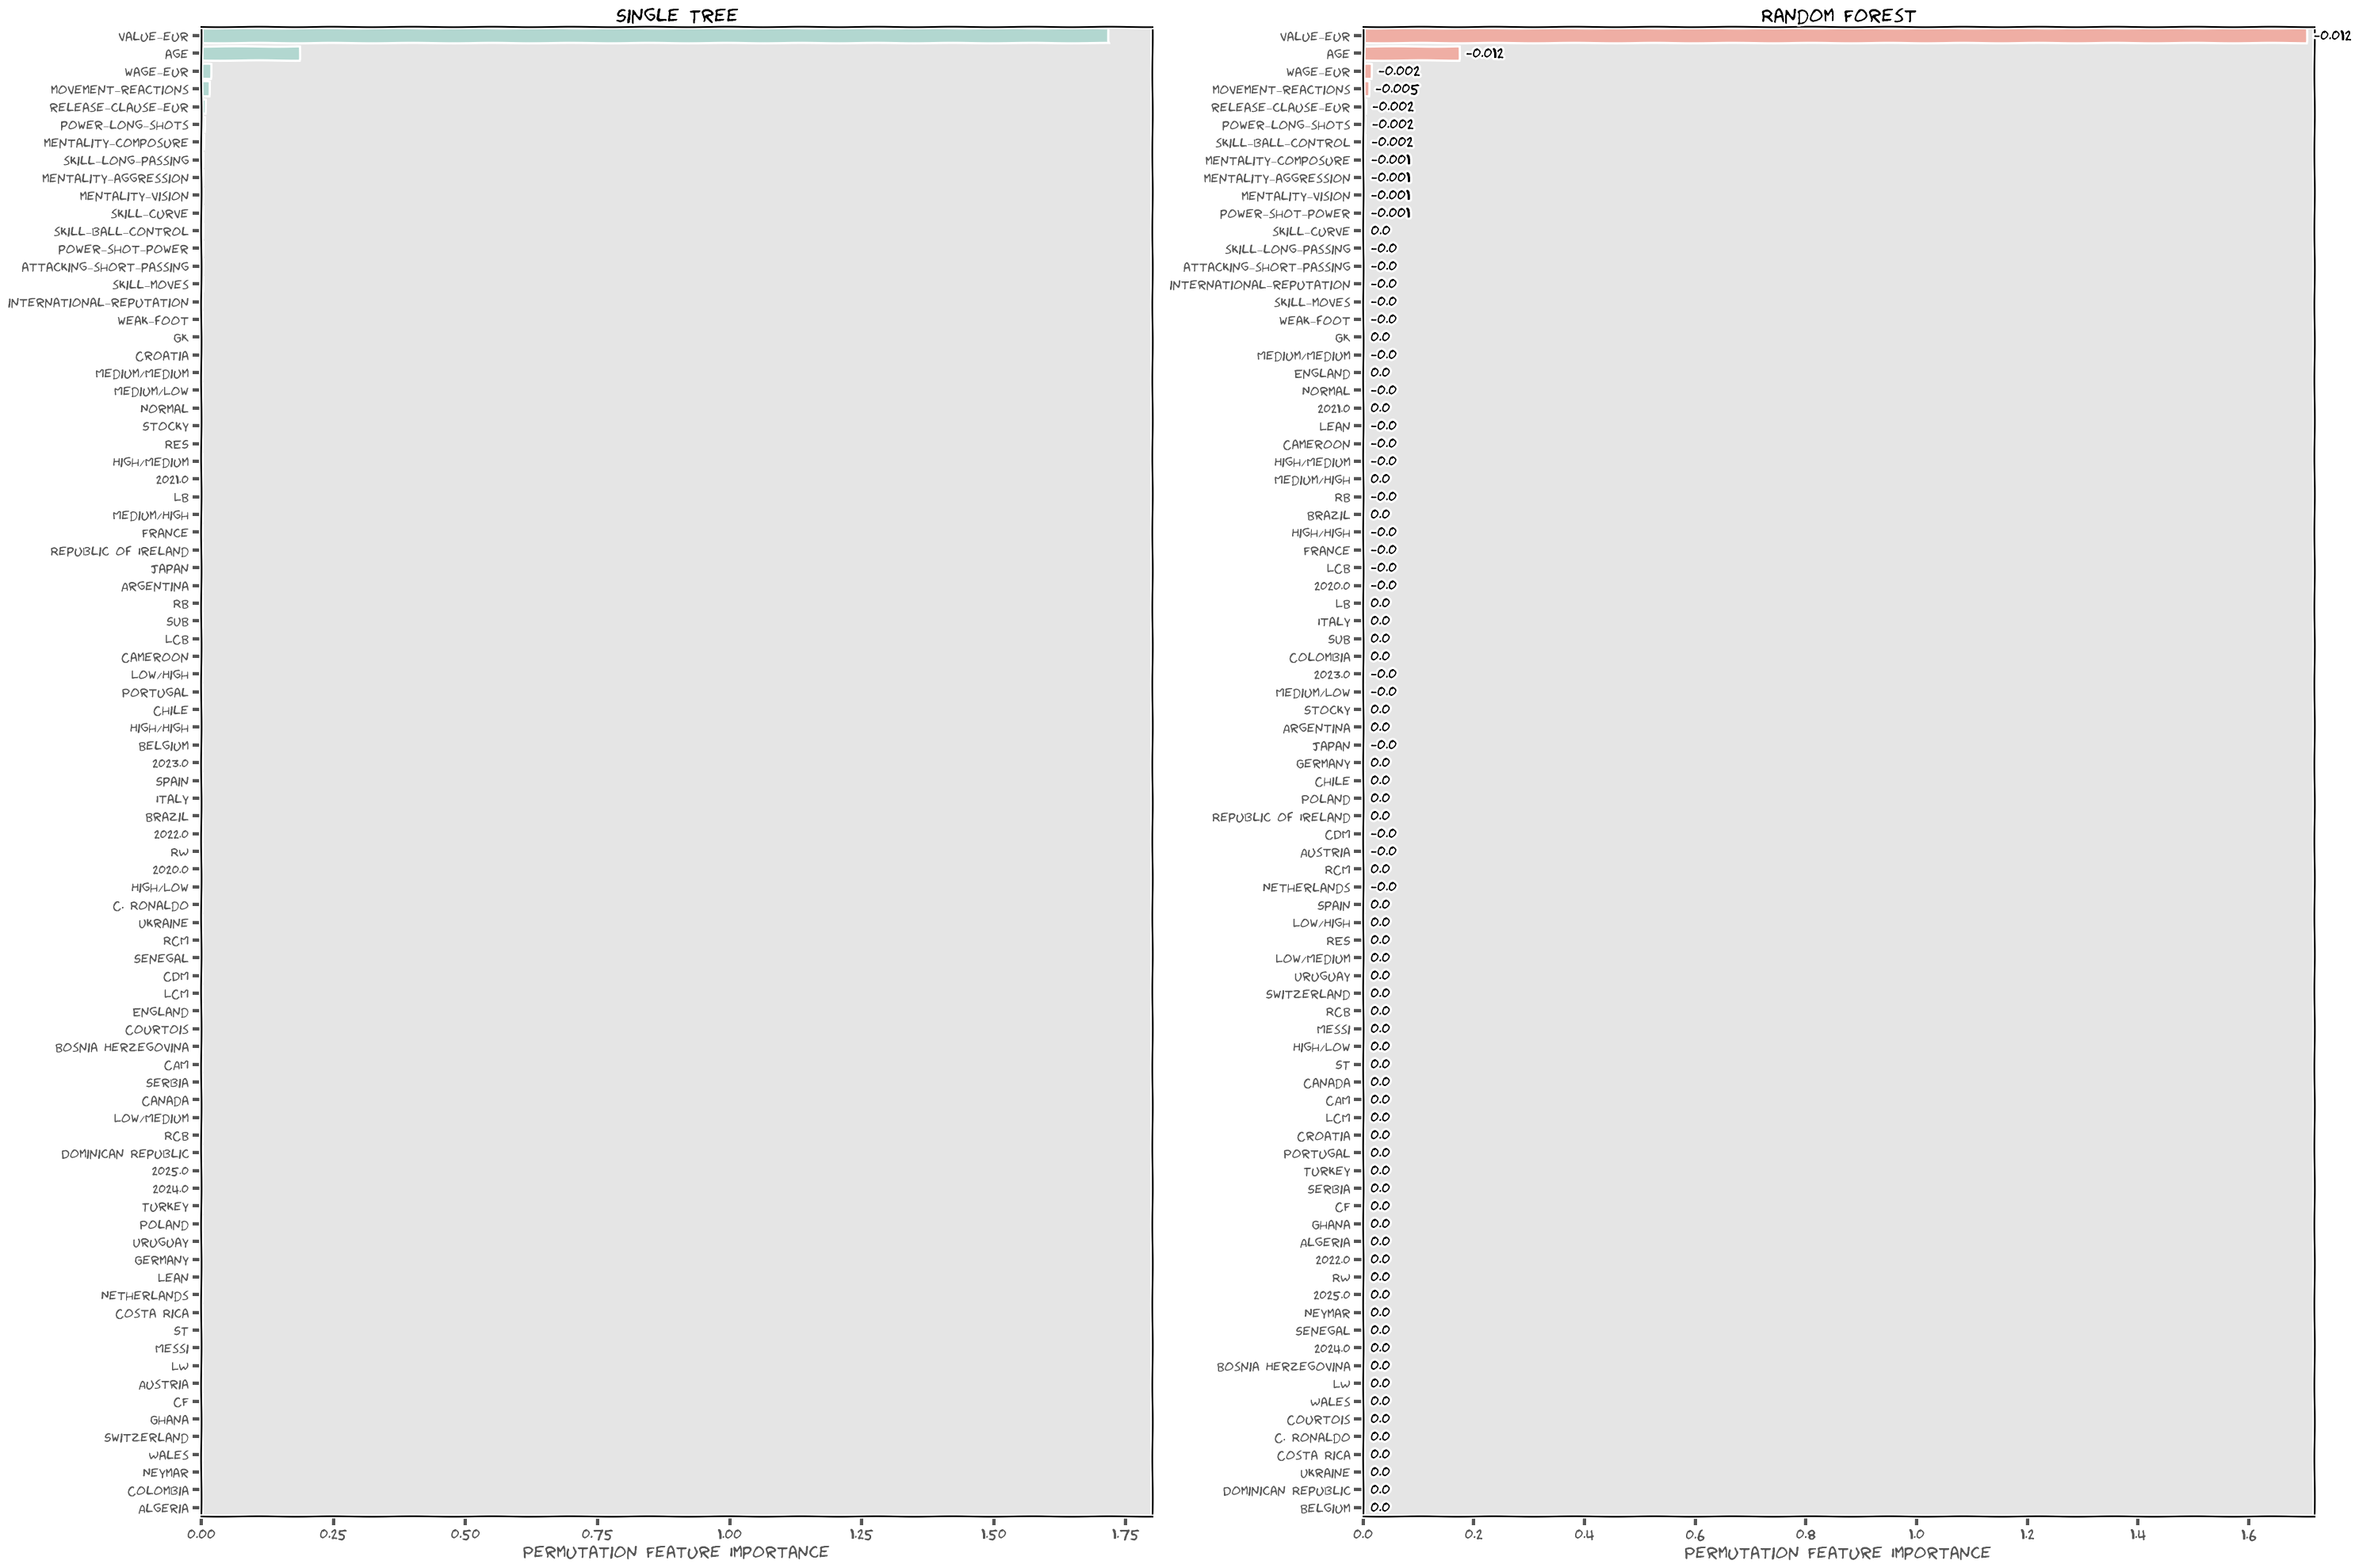

In [ ]:


# Define a Random Forest classifier with random_state as the above defined variable
# Set the maximum depth to be max_depth and use 10 estimators
random_state=101
max_depth=10

# Set the maximum depth to be max_depth
tree = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)

# Fit the model on the entire data
tree.fit(x_train, y_train);

y_pred_tree= tree.predict(x_test)
mse = mean_squared_error(y_test, y_pred_tree)
print(f'The mean squared error using Decision Tree Regressor is {mse:.4f}')
# Using Permutation Importance to get the importance of features for the Decision Tree 
# with random_state as the above defined variable
tree_result = permutation_importance(tree, x_train, y_train, random_state=random_state)
forest = RandomForestRegressor(random_state=random_state, n_estimators=10, max_depth=max_depth)

# Fit the model on the entire data
forest.fit(x_train, y_train);
y_pred_forest1= forest.predict(x_test)
mse = mean_squared_error(y_test, y_pred_forest1)
print(f'The mean squared error using Random Forest Regressor is {mse:.4f}')
# Use Permutation Importance to get the importance of features for the Random Forest model 
# with random_state as the above defined variable
forest_result = permutation_importance(forest, x_train, y_train, random_state=random_state)
plot_feature_importance(tree,forest,x_train,y_train);

# # Helper code to visualize the feature importance using 'permutation feature importance'
plot_permute_importance(tree_result,forest_result,x_train,y_train);

According to the impurity based feature importance and permutation based feature importance, we get following relevant features for deciding the ranking of the features:
1. Value_eur
2. Wage_eur
3. Age
4. Movement_reactions

Let us again train the models on these features

In [ ]:

# Define a Random Forest classifier with random_state as the above defined variable
# Set the maximum depth to be max_depth and use 10 estimators
random_state=101
max_depth=10

forest = RandomForestRegressor(random_state=random_state, n_estimators=10, max_depth=max_depth)

# Fit the model 
forest.fit(x_train[["value_eur", "wage_eur", "age", "movement_reactions"]], y_train);
y_pred_forest_= forest.predict(x_test[["value_eur", "wage_eur", "age", "movement_reactions"]])
mse = mean_squared_error(y_test, y_pred_forest_)
print(f'The mean squared error using Random Forest Regressor is {mse:.4f}')

In [ ]:
df20_rank = df20[["short_name"]].copy()
df20_rank["rank"] = pd.Series(y_pred_forest).rank(ascending=False)
df20_rank["overall"] = df20_proc["overall"]
df20_rank.sort_values("rank", inplace = True)
df20_rank.head(10)

**Hyperparameter Tuning**

1.  No. of trees, No. of iterations

In [ ]:
%%time
##No.
from collections import OrderedDict
clf = RandomForestRegressor(warm_start=True, 
                               oob_score=True,
                               min_samples_leaf=40,
                               max_depth = 10,
                               random_state=101)

error_rate = {}

# Range of `n_estimators` values to explore.
min_estimators = 150
max_estimators = 500

for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i) 
    clf.fit(x_train.values, y_train.values)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - clf.oob_score_
    error_rate[i] = oob_error

CPU times: user 7min, sys: 5.41 s, total: 7min 5s
Wall time: 7min 5s


2. min_samples_leaf

In [ ]:
%%time
from collections import OrderedDict
ensemble_clfs = [
    (1,
        RandomForestRegressor(warm_start=True, 
                               min_samples_leaf=1,
                               oob_score=True,
                               max_depth = 10,
                               random_state=101)),
    (5,
        RandomForestRegressor(warm_start=True, 
                               min_samples_leaf=5,
                               oob_score=True,
                               max_depth = 10,
                               random_state=101))
]

# Map a label (the value of `min_samples_leaf`) to a list of (model, oob error) tuples.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 80
max_estimators = 500

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i) 
        clf.fit(x_train.values, y_train.values)

        # Record the OOB error for each model. Error is 1 - oob_score
        # oob_score: score of the training dataset obtained using an 
        # out-of-bag estimate.
        # OOB error rate is % of num_missclassified/total observations
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


CPU times: user 13min 14s, sys: 22.2 s, total: 13min 36s
Wall time: 13min 33s


In [ ]:
err = 100
best_num_estimators = 0
for label, clf_err in error_rate.items():
    num_estimators, error = min(clf_err, key=lambda n: (n[1], -n[0]))
    if error<err: err=error; best_num_estimators = num_estimators; best_leaf = label

print(f'Optimum num of estimators: {best_num_estimators} \nmin_samples_leaf: {best_leaf}')


Optimum num of estimators: 500 
min_samples_leaf: 1


**OPTIMUM MODEL**

Random forest with 

num_estimators=470

min_samples_leaf=1


In [ ]:


#Defining a random forest regressor with optimised parameters
random_state=101

forest = RandomForestRegressor(random_state=random_state, n_estimators=best_num_estimators, min_samples_leaf=best_leaf)

# Fit the model on the entire data
forest.fit(x_train[["value_eur", "wage_eur", "age", "movement_reactions"]], y_train);
y_pred_forest= forest.predict(x_test[["value_eur", "wage_eur", "age", "movement_reactions"]])
mse = mean_squared_error(y_test, y_pred_forest)
print(f'The mean squared error using Random Forest Regressor is {mse:.4f}')
# Use Permutation Importance to get the importance of features for the Random Forest model 

forest_result = permutation_importance(forest, x_train[["value_eur", "wage_eur", "age", "movement_reactions"]], y_train, random_state=random_state)


The mean squared error using Random Forest Regressor is 0.5785


In [ ]:
df20_rank = df20[["short_name"]].copy()
df20_rank["rank"] = pd.Series(y_pred_forest).rank(ascending=False)
df20_rank["overall"] = df20_proc["overall"]
df20_rank.sort_values("rank", inplace = True)
df20_rank.head(10)

short_name  rank  overall
0            L. Messi   1.0     94.0
1   Cristiano Ronaldo   2.0     93.0
2           Neymar Jr   3.0     92.0
3            J. Oblak   4.0     91.0
4           E. Hazard   5.0     91.0
14             De Gea   6.0     89.0
11       K. Koulibaly   7.0     89.0
6       M. ter Stegen   8.0     90.0
9            M. Salah   9.0     89.0
22       A. Griezmann  10.0     88.0

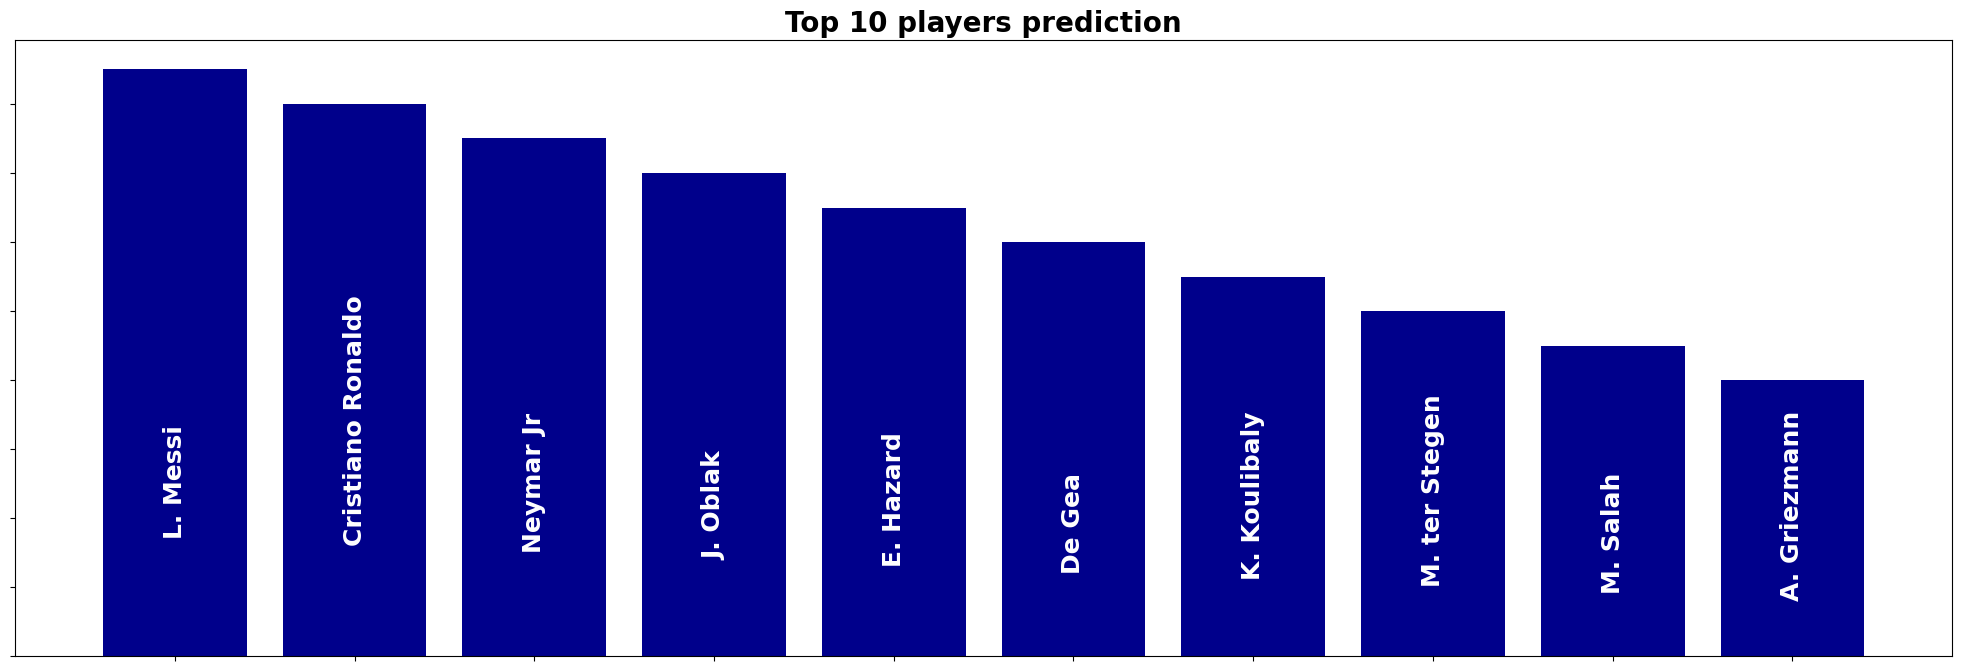

In [ ]:
plt.style.use('default')
fig,ax = plt.subplots(figsize=(25,8))
x=df20_rank["short_name"].iloc[:10]
y=df20_rank["rank"].iloc[:10]
bar = ax.bar(x, 18-y , alpha=1, color='darkblue')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
# For Y-axis
ax.set_title("Top 10 players prediction", fontweight='bold',  fontsize=20)


def bartext(bar):
    for idx,br in enumerate(bar):
        height = br.get_height()
        ax.text(br.get_x() + br.get_width()/2., 0.2*height,
                df20_rank["short_name"].iloc[idx],
                ha='center', va='bottom', rotation=90, fontweight='bold', fontsize=18, color='white')

bartext(bar)



In [ ]:
l_rate = 0.05

# Initialise a Boosting model using sklearn's boosting model 
# Use 1000 estimators, depth of 1 and learning rate as defined above
boosted_model  = GradientBoostingRegressor(n_estimators=800, max_depth=1, learning_rate = l_rate)
# Fit on the train data
boosted_model.fit(x_train[["value_eur", "wage_eur", "age", "movement_reactions"]], y_train)

# Predict on the test data
y_pred = boosted_model.predict(x_test[["value_eur", "wage_eur", "age", "movement_reactions"]])
y_pred_boost= boosted_model.predict(x_test[["value_eur", "wage_eur", "age", "movement_reactions"]])
mse = mean_squared_error(y_test, y_pred_boost)
print(f'The mean squared error using Random Forest Regressor is {mse:.4f}')

The mean squared error using Random Forest Regressor is 0.9880


In [ ]:

df20_rank = df20[["short_name"]].copy()
df20_rank["rank"] = pd.Series(y_pred_boost).rank(ascending=False)
df20_rank["overall"] = df20_proc["overall"]
df20_rank.sort_values("rank", inplace = True)
df20_rank.head(10)

short_name  rank  overall
1   Cristiano Ronaldo   3.5     93.0
21    Sergio Busquets   3.5     88.0
20     R. Lewandowski   3.5     88.0
6       M. ter Stegen   3.5     90.0
8           L. Modrić   3.5     89.0
10          K. Mbappé   3.5     89.0
0            L. Messi  10.5     94.0
32          H. Lloris  10.5     87.0
22       A. Griezmann  10.5     88.0
56         Marquinhos  10.5     85.0

In [ ]:
# Specify the number of bootstraps
num_bootstraps = 30

# Specify the maximum depth of the decision tree
max_depth = 10

# Define the Bagging Regressor Model
# Use Decision Tree as your base estimator with depth as mentioned in max_depth
# Initialise number of estimators using the num_bootstraps value
# Set max_samples as .8 and random_state as 3
model = BaggingRegressor(DecisionTreeRegressor(max_depth=max_depth), n_estimators=num_bootstraps,max_samples=0.8, random_state=3 )
                        

# Fit the model on the train data
model.fit(x_train[["value_eur", "wage_eur", "age", "movement_reactions"]], y_train)
y_pred_bag= model.predict(x_test[["value_eur", "wage_eur", "age", "movement_reactions"]])
mse = mean_squared_error(y_test, y_pred_bag)
print(f'The mean squared error using Bagging  Regressor is {mse:.4f}')

The mean squared error using Bagging  Regressor is 0.6335


### Inference: According to our best model predictions, L. Messi is ranked as the best player that is also validated by the overall score in the players20.csv dataset

# PART B: Classify player position

 - Train on data from FIFA 19. Predict the player_position variable using other skill statistics for players in the FIFA 20 Edition. Train on all players from FIFA 19

 - Graphically represent the predicted player_position for the players in Test Set 

Details : 

 - Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning.

 - The final score will be assigned using Classification Accuracy

Test Set: Players from the following Clubs 

 - FC Barcelona

 - FC Bayern München

 - Real Madrid 

 - Paris Saint-Germain

 - Juventus

 - Atlético Madrid

 - Manchester City

 - Liverpool 

 - Manchester United

In [4]:
# Loading the data
df = pd.read_csv('./data/players_19.csv')

# Let have a quick look at the data
df.head()

sofifa_id                                         player_url  \
0      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
1     158023  https://sofifa.com/player/158023/lionel-messi/...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     193080  https://sofifa.com/player/193080/david-de-gea-...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name  age         dob  \
0  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   33  1985-02-05   
1           L. Messi       Lionel Andrés Messi Cuccittini   31  1987-06-24   
2          Neymar Jr        Neymar da Silva Santos Junior   26  1992-02-05   
3             De Gea                David De Gea Quintana   27  1990-11-07   
4       K. De Bruyne                      Kevin De Bruyne   27  1991-06-28   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        187         83    Portugal             Juventus  ...  65+3  61+3   
1        170         72   Argentina         FC Barcelona  ...  63+2  61+2   
2        175         68      Brazil  Paris Saint-Germain  ...  65+3  60+3   
3        193         76       Spain    Manchester United  ...   NaN   NaN   
4        181         70     Belgium      Manchester City  ...  77+3  77+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
1  61+2  61+2  63+2  58+2  47+2  47+2  47+2  58+2  
2  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3  

[5 rows x 104 columns]

### Preprocessing the data

Taking a quick look, we quickly realize that we need to preprocess the data. We were asked not to use Sofifa ID, player URL, name, wage, salary and real face. Hence these columns are added to the list of columns to be removed. Additionally, we have removed extra columns for this part due to the following reasons:
* Player traits and player tags are not necessary for this exercise. Some traits and tags can be crucial in identifying the player position and can directly give away the position of the player, but the proportion of player having tags and traits is not significant.
* Date-of-Birth information is already given by 'age.' Hence, this was removed.
* Team position and nation position are a subset of the response variable - player_positions.
* Date joined and loaned from do not add any information to the given task.
* Every club and national team need players of every position. Hence, clubs and nationality might not be good predictors. There could be minor affiliation between the club style of play and the kind of players they have. For example, if a club is known to play defensive football, they might have defenders of high quality. In such cases, the clubs along with the overall rating of a player can give some hint on the player position. Such affiliations are purely speculations and for computational ease, we believe it is best to leave them out.

The importance of other features can be determined after fitting a baseline model. For now, we believe some features add some value to the model for the following reasons:
* In football, attackers are more popular than players of other positions. Ask any fan their favorite player and they will likely name an attacker or an attacking midfielder. If international reputation is scored based on fans' perspective, international reputation can be biased towards attackers and can contain information regarding the player position. For example, defenders and goalkeepers often go unnoticed compared to attackers in a football match. This might affect the international reputation of goalkeepers in the dataset. 
* Jersey numbers have a very strong correlation with the player position. Hence this is not removed.
* The duration of contract (encoded in contract_valid_until) might provide some information. Clubs usually retain their best players for longer duration and if a club is known to have a stronger affiliation towards players of a certain position, their contract duration might give a small hint on the player position.

In [5]:
df['body_type'].value_counts()

Normal                 10410
Lean                    6268
Stocky                  1085
Akinfenwa                  1
Neymar                     1
Courtois                   1
C. Ronaldo                 1
Messi                      1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Name: body_type, dtype: int64

<i>body_type</i> as a predictor has some distinct outliers. In order to fix it, we can assign these outliers to any one of 'Normal', 'Lean' or 'Stocky.' The graph below helps us visualize the body type as a scatter plot between physical strength and body weight in kgs.

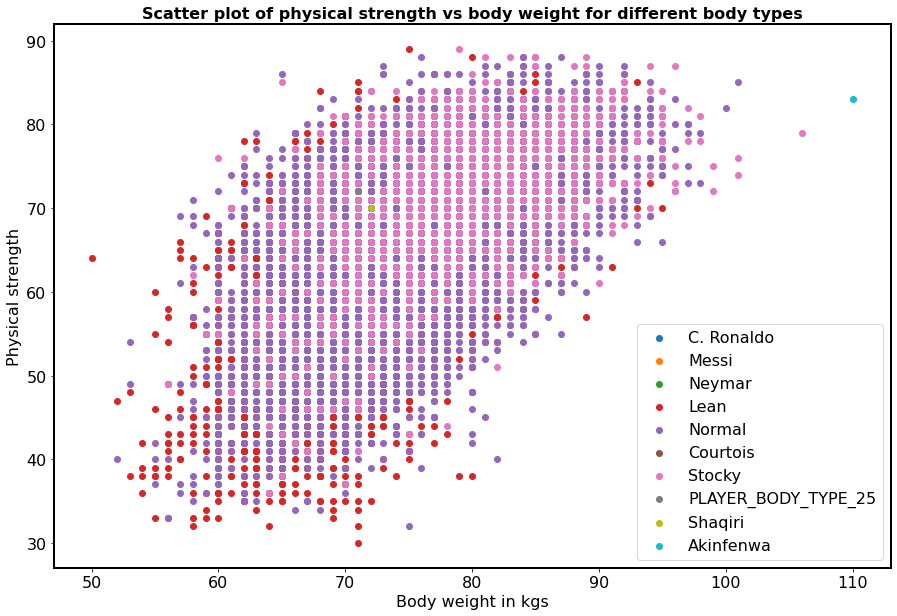

In [184]:
plt.figure(figsize=(15,10))
for btype in df['body_type'].unique():
    plt.scatter(df[df['body_type']==btype]['weight_kg'], df[df['body_type']==btype]['physic'], label=btype)

plt.xlabel("Body weight in kgs")
plt.ylabel("Physical strength")
plt.title("Scatter plot of physical strength vs body weight for different body types", fontweight='bold')
plt.legend(loc='lower right')
plt.show()

Except 'Akinfenwa', every other body type lies within the mass pool of all other players. 'Normal' seems to be the most dominating <i>body_type</i> across all body weights and physical strengths. Hence, we have assigned all the outlier body types to 'Normal'.

**The <i>Preprocessor</i> class:**

In order make preprocessing easier to read, code and reuse, we have put it in a class for this part. Preprocessing varies for different tasks, so this class is specifically used fot Part B. The functions used are explained below:
* <i>order_position()</i>: In the player_positions column, the ordering of positions of a player does not matter. For example, 'CDM, CM' and 'CM, CDM' are exactly the same. This function processes such differently ordered values and makes them uniform - that is, 'CM, CDM' and 'CDM, CM' both become 'CDM, CM'
* <i>eval_attribute()</i>: This is a helper function which evaluates the arthimetic operation in the string expression. For example, for a string input of '76+1', it return 77 as an integer.
* <i>get_final_potential()</i>: Several attributes of players are often given as the "current value + possible change over time". That is, if the 'pace' of a player is given as '80+3', it means that the current pace is 80 and the player can have a pace of 83 if certain conditions are met. As a part of preprocessing, we have only taken the final value of such players (in this case 83). This function takes all such columns and finds the final attribute value.
* <i>bdtype_normalize()</i>: Assigns the outlier body types as 'Normal'.
* <i>one_hot_encode()</i>: One-hot encodes all the categorical variables except the response variable.
* <i>fit()</i>: This is the driver code which calls all the other necessary function and returns the preprocessed data.

In [7]:
# A class that contains all the functions for preprocessing
class Preprocessor:
    def __init__(self, drop_list):
        self.drop_list = drop_list
    
    def eval_attribute(self, expr):
        """
        Return the final output after performing the arithmetic operation in string.

        Parameters
        ----------
        arg1: str
            A string containing the arithmetic expression to be evaluated

        Returns
        -------
        int
            The final value after the arithmetic operation
        """
        if type(expr)==int:
            return expr
        if expr.find("+")!=-1:
            return sum(map(int, expr.split("+")))
        elif expr.find("-")!=-1:
            return sum(map(int, expr.split("-")))
        else:
            return int(expr)
        
    def order_position(self, df):
        """
        Orders the player positions properly.

        Parameters
        ----------
        arg1 : Pandas DataFrame (or) Series
            A DataFrame or Series containing the player_positions columns values

        Returns
        -------
        Pandas DataFrame (or) Series
            The final column values after being corrected
        """
        for i in range(len(df)):
            df.iloc[i] = ', '.join(set(df.iloc[i].split(', ')))
        return df
        
    def get_final_potential(self, df):
        """
        Applies the eval_attribute function to every column that requires it.

        Parameters
        ----------
        arg1 : Pandas DataFrame
            The entire raw data in a Pandas DataFrame

        Returns
        -------
        Pandas DataFrame
            The final DataFrame with eval_attribute applied to all the columns that require it.
        """
        col_list = df.columns.tolist()
        toint_cols = col_list[col_list.index('attacking_crossing'):]
        
        for col in toint_cols:
            df[col].fillna(value = '0', inplace=True)
            df[col] = pd.Series(map(self.eval_attribute, df[col]))
            
        return df
    
    def bdtype_normalize(self, df):
        """
        Normalizes the body type outliers
        
        Parameters
        ----------
        arg1 : Pandas DataFrame
            The entire input DataFrame
            
        Returns
        -------
        Pandas DataFrame
            The modified DataFrame with normalized outliers
        """
        
        bdtype_outliers = df['body_type'].value_counts().index[df['body_type'].value_counts()==1].tolist()
        
        for bdtype in bdtype_outliers:
            ind = df.index[df['body_type']==bdtype][0]
            df['body_type'][ind] = 'Normal'
            
        return df
    
    def one_hot_encode(self, df):
        """
        One-hot encodes all the categorical variables except the response variable
        
        Parameters
        ----------
        arg1 : Pandas DataFrame
            The input DataFrame containing the categorical variables
            
        Returns
        -------
        Pandas DataFrame
            The processed DataFrame with one-hot encoded variables
        """
        
        obj_cols = [col for col in df.columns if df[col].dtype==object]
        obj_cols.remove('player_positions')
        
        return pd.get_dummies(df, columns = obj_cols)
    
    def fit(self, df):
        """
        Preprocesses the input raw data (the driver function). The only function that needs to be called outside the class.

        Parameters
        ----------
        arg1 : Pandas DataFrame
            The raw input data as a DataFrame

        Returns
        -------
        Pandas DataFrame
            The preprocessed output as a DataFrame
        """
        
        # Dropping the columns in drop_list
        df.drop(self.drop_list, axis=1, inplace=True)
        
        # Ordering player positions
        df['player_positions'] = self.order_position(df['player_positions'])
        
        # Getting the final value on player attributes
        df = self.get_final_potential(df)
        
        # Normalizing the body_type outliers
        df = self.bdtype_normalize(df)
        
        # Filling nans
        df.fillna(value = 0.0, inplace=True)
        
        # One-hot encoding
        df = self.one_hot_encode(df)
        
        return df

In [8]:
# Dropping features that should not be used
drop_list = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'potential', 'wage_eur', 'real_face','nationality', \
             'player_traits', 'player_tags', 'dob', 'team_position', 'nation_position', 'loaned_from', 'joined', 'club']

# Initializing a Preprocessor object
preprocessor = Preprocessor(drop_list)

# Preprocessing the data
df_train = preprocessor.fit(df.copy())

# Having a quick look at the preprocessed data
df_train.head()

age  height_cm  weight_kg  overall  value_eur player_positions  \
0   33        187         83       94   77000000           ST, LW   
1   31        170         72       94  110500000       CF, ST, RW   
2   26        175         68       92  118500000          CAM, LW   
3   27        193         76       91   72000000               GK   
4   27        181         70       91  102000000          CM, CAM   

   international_reputation  weak_foot  skill_moves  release_clause_eur  ...  \
0                         5          4            5         127100000.0  ...   
1                         5          4            4         226500000.0  ...   
2                         5          5            5         228100000.0  ...   
3                         4          3            1         138600000.0  ...   
4                         4          5            4         196400000.0  ...   

   work_rate_High/Medium  work_rate_Low/High  work_rate_Low/Low  \
0                      0                   0                  0   
1                      0                   0                  0   
2                      1                   0                  0   
3                      0                   0                  0   
4                      0                   0                  0   

   work_rate_Low/Medium  work_rate_Medium/High  work_rate_Medium/Low  \
0                     0                      0                     0   
1                     0                      0                     0   
2                     0                      0                     0   
3                     0                      0                     0   
4                     0                      0                     0   

   work_rate_Medium/Medium  body_type_Lean  body_type_Normal  body_type_Stocky  
0                        0               0                 1                 0  
1                        1               0                 1                 0  
2                        0               0                 1                 0  
3                        1               1                 0                 0  
4                        0               0                 1                 0  

[5 rows x 99 columns]

### Baseline Model and Feature Selection

We will fit a Logistic Regression model as a baseline model with all the features present right now. Based on feature importance, we can omit several features. Feature importance has been decided using hypothesis testing.

Performing feature selection on the baseline model is not the most efficient method. Features that seem insignifacnt to the baseline model might contribute significantly in a more sophisticated model. However, features like international reputation, duration of contract, etc. can be removed if they are not significant for baseline model.

In [9]:
# Number of bootstraps
numboot = 10

# List to store coefficients
coef_list = list()

for i in range(numboot):
    
    # Sampling the data
    df_sampled = df_train.sample(frac=1, replace=True)
    
    # Setting the predictor and response variables
    X_train = df_sampled.drop('player_positions', axis=1)
    y_train = df_sampled['player_positions']
    
    # Declaring a Logistic Regression model
    lreg = LogisticRegression()
    
    # Fitting the model in training data
    lreg.fit(X_train, y_train)
    
    # Appending the coefficients
    coef_list.extend(list(lreg.coef_))

We have taken 10 bootstraps and build a model on the sampled data. Each bootstrapped data presents a multi-class classification problem and hence, each bootstrap has ~350 models. So for 10 bootstraps, we get coefficients as though we were training ~3500 binary classifiers. On this, we perform hypothesis testing to determine significant features.

For each predictor $X_i$, the null and alternate hypothesis are:
<center> $H_0 :$ There is no relation between $X_i$ and $Y$
<center> $H_a :$ There is a relation between $X_i$ and $Y$
    
We use $\hat{t}-test$ as the test statistic. Over the bootstrapped data, it is given by:
<center> $\hat{t}-test = \frac{\mu_\hat{\beta_i}}{\sigma_\hat{\beta_i}}$
    
If the p-value for $|\hat{t}_i|$ is less than 0.05, we reject the null hypothesis.

In [10]:
#coef_list = [val.tolist() for val in coef_list]

# Computing the t-test values
tt = np.abs(np.divide(np.mean(coef_list, axis=0), np.std(coef_list, axis=0)))

# Getting the p-values
p_vals = stats.t.sf(tt, len(df_train)-1)*2

# Printing the significant features
print("The significant features are: ")
for i in range(len(p_vals)):
    if p_vals[i]<0.05:
        print(df.columns[i])

The significant features are: 


Hypothesis testing, unfortunately did not run successfully. We performed hyposthesis testing assuming that the Logistic Regression model does a good job in modelling the relations. The model could be the one to blame here as the coefficients are extremely small (of the order 1e-11), indicating that the model fails to relate attributes significantly to the response variable.

In [11]:
# Setting the predictor and response variables
X_train = df_train.drop('player_positions', axis=1)
y_train = df_train['player_positions']

# Creating the base model
base_model = LogisticRegression()

# Fitting the train data on the model
base_model.fit(X_train, y_train)

LogisticRegression()

### Decision Trees

We saw that Logistic Regression model performed poorly just by the fact that it did not have any significant features. We move on to more comlex models, starting with Decision Trees.

The stopping criteria we use is max_depth. In the next cell, we find the optimal value of max_depth using cross-validation approach.

In [13]:
# Setting the random state in a variable for easy modification
random_state = 44

# The maximum value of max-depth to try
depth_limit = 25

# List to store the accuracies
accuracy_list = list()

# Iterating over each max_depth value
for d in range(1,depth_limit+1):
    
    # Declaring a Decision Tree model with the desired max_depth
    dtree = DecisionTreeClassifier(max_depth=d, random_state=random_state)
    
    # Getting the scores via cross_validate
    score = cross_validate(dtree, X_train, y_train, cv=5, scoring='accuracy')
    
    # Storing the accuracy values
    accuracy_list.append(np.mean(score['test_score']))

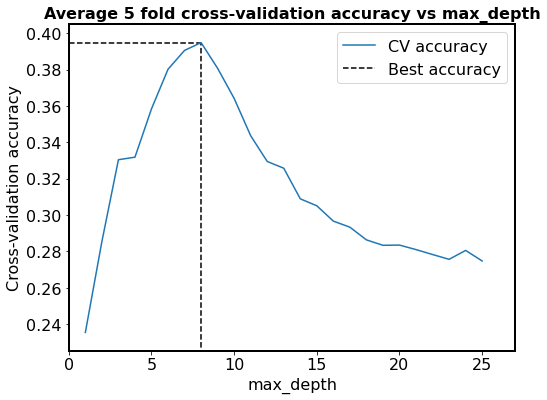

The best depth is:  8


In [14]:
# Finding best depth and accuracy
best_accuracy = max(accuracy_list)
best_depth = np.argmax(accuracy_list)+1

# Plotting accuracy vs depth
plt.figure(figsize=(8,6))
plt.plot(range(1,depth_limit+1), accuracy_list, label='CV accuracy')
plt.hlines(best_accuracy, xmin=0, xmax=best_depth, linestyles="dashed", colors='k', label="Best accuracy")
plt.vlines(best_depth, ymin = 0,ymax=best_accuracy, linestyles="dashed", colors='k')
plt.xlim((0, depth_limit+2))
plt.ylim((min(accuracy_list)-0.01, max(accuracy_list)+0.01))
plt.xlabel("max_depth")
plt.ylabel("Cross-validation accuracy")
plt.title("Average 5 fold cross-validation accuracy vs max_depth", fontweight="bold")
plt.legend()
plt.show()

print("The best depth is: ", best_depth)

Now that we have found the best depth, we will build a model with the best depth and store it for comparing the results later.

In [15]:
# Declaring the best Decision Tree model
dtree_model = DecisionTreeClassifier(max_depth = best_depth, random_state = random_state)

# Fitting the training data on the model
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=44)

### Bagging

The advantage of bagging is that we can build deeper trees without overfitting the data. The number of trees, however needs to be fixed.

We begin by determining the optimal max_depth of the Decision Tree classifiers used in Bagging. After finding the best max_depth, we find the optimal number of estimator (or bootstraps) for bagging. This would complete the Bagging model.

For ensemble models, we have a quicker method to tune hypermeters by computing the OOB error. We have used OOB error to tune the hyperparameters over cross-validation.

In [65]:
# Setting the maximum max_depth limit
depth_limit = 35

# Creating a list to store the OOB errors
error_list = list()

for d in range(1, depth_limit+1):
    
    # Creating a Bagging Classifier model
    bag_classi = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=d), 
                                   random_state = random_state, 
                                   oob_score=True)
    
    # Fitting the training data
    bag_classi.fit(X_train, y_train)
    
    # Storing the OOB error
    error_list.append(1-bag_classi.oob_score_)

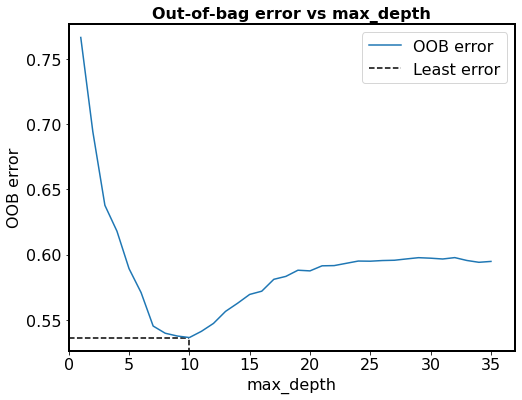

The best depth is:  10


In [66]:
# Finding best depth and error
best_error = min(error_list)
best_depth = np.argmin(error_list)+1

# Plotting OOB error vs depth
plt.figure(figsize=(8,6))
plt.plot(range(1,depth_limit+1), error_list, label='OOB error')
plt.hlines(best_error, xmin=0, xmax=best_depth, linestyles="dashed", colors='k', label="Least error")
plt.vlines(best_depth, ymin = 0,ymax=best_error, linestyles="dashed", colors='k')
plt.xlim((0, depth_limit+2))
plt.ylim((min(error_list)-0.01, max(error_list)+0.01))
plt.xlabel("max_depth")
plt.ylabel("OOB error")
plt.title("Out-of-bag error vs max_depth", fontweight="bold")
plt.legend()
plt.show()

print("The best depth is: ", best_depth)

Now we know what the best depth is, we move on to find the optimal number of estimators.

In [18]:
# Maximum limit for n_estimators
estimator_limit = 35

# List to store the OOB error
error_list = list()

for n in range(1,estimator_limit+1):
    
    # Creating a Bagging Classifier with the best depth and the current n_estimators
    bag_classi = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=best_depth),
                                   n_estimators = n, 
                                   random_state = random_state, 
                                   oob_score = True)
    
    # Fitting the training data
    bag_classi.fit(X_train, y_train)
    
    # Storing the OOB error
    error_list.append(1-bag_classi.oob_score_)

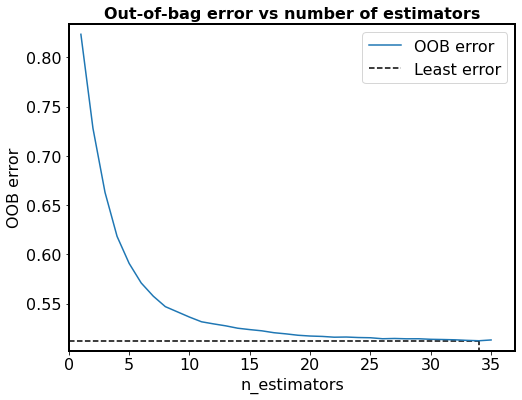

The best number of estimators is:  34


In [19]:
# Getting the optimal n_estimators
best_error = min(error_list)
best_n_estimators = np.argmin(error_list)+1

# Plotting OOB error vs n_estimators
plt.figure(figsize=(8,6))
plt.plot(range(1, estimator_limit+1), error_list, label="OOB error")
plt.hlines(best_error, xmin=0, xmax=best_n_estimators, linestyles="dashed", colors='k', label="Least error")
plt.vlines(best_n_estimators, ymin=0, ymax=best_error, linestyles="dashed", colors='k')
plt.xlim((0, estimator_limit+2))
plt.ylim((min(error_list)-0.01, max(error_list)+0.01))
plt.xlabel("n_estimators")
plt.ylabel("OOB error")
plt.title("Out-of-bag error vs number of estimators", fontweight="bold")
plt.legend()
plt.show()

print("The best number of estimators is: ", best_n_estimators)

We see that the error flatten after 20. So 100 is a safe value for n_estimators.

In [67]:
# Creating the optimal Bagging model
bagging_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=best_depth),
                                 n_estimators = 100,
                                 random_state = random_state)

# Fitting the data on the optimal Bagging model
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=100, random_state=44)

### Random Forests

We know that trees in Bagging are highly correlated and Random Forests is a de-correlated version of Bagging. This should, in theory, offer better performance that Bagging.

Given that the best depth for single Decision Tree and Bagging are less than 10, it is safe to assume that Random Forest would have a similar best max_depth. This saves time in finding the best max_depth. The number of predictors to use at each split is given by $\sqrt{N_j}$, which in our case comes to be $\sqrt{99} \approx 10$. <i>sklearn</i> uses square-root of number of predictors by default to choose the number of predictors, hence this information need not be coded.

Let us begin by estimating the value of max_depth, by searching in a limited range based on our analysis from Bagging and Decision Tree classifier.

In [21]:
# Setting the maximum value for max_depth
depth_limit = 25

# A list to store the OOB errors
error_list = list()

for d in range(1, depth_limit+1):
    
    # Creating the Random Forest model
    ranf = RandomForestClassifier(max_depth = d, oob_score = True, random_state = random_state)
    
    # Fitting the data
    ranf.fit(X_train, y_train)
    
    # Storing the OOB error
    error_list.append(1 - ranf.oob_score_)

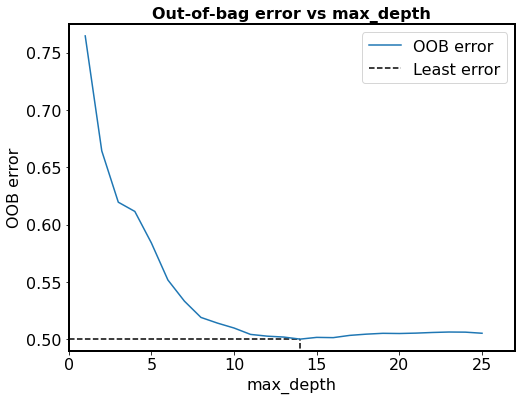

The best depth is:  14


In [22]:
# Finding the optimal max_depth
best_error = min(error_list)
best_depth = np.argmin(error_list)+1

# Plotting error vs depth
plt.figure(figsize=(8,6))
plt.plot(range(1,depth_limit+1), error_list, label='OOB error')
plt.hlines(best_error, xmin=0, xmax=best_depth, linestyles="dashed", colors='k', label="Least error")
plt.vlines(best_depth, ymin = 0,ymax=best_error, linestyles="dashed", colors='k')
plt.xlim((0, depth_limit+2))
plt.ylim((min(error_list)-0.01, max(error_list)+0.01))
plt.xlabel("max_depth")
plt.ylabel("OOB error")
plt.title("Out-of-bag error vs max_depth", fontweight="bold")
plt.legend()
plt.show()

print("The best depth is: ", best_depth)

The error flattens after 14 as max_depth value. We will choose 25 as the max_depth.

In [23]:
# The maximum limit on n_estimators
estimator_limit = 60

# A list to store the OOB errors
error_list = list()

for n in range(1, estimator_limit+1):
    
    # Creating the Random Forest model
    ranf = RandomForestClassifier(n_estimators = n, max_depth = best_depth, oob_score = True, random_state = random_state)
    
    # Fitting the training data
    ranf.fit(X_train, y_train)
    
    # Storing the OOB error values
    error_list.append(1 - ranf.oob_score_)

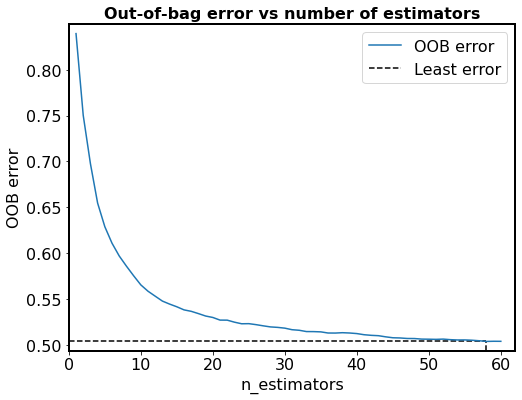

The best number of estimators is:  58


In [24]:
# Getting the optimal n_estimators
best_error = min(error_list)
best_n_estimators = np.argmin(error_list)+1

# Plotting OOB error vs n_estimators
plt.figure(figsize=(8,6))
plt.plot(range(1, estimator_limit+1), error_list, label="OOB error")
plt.hlines(best_error, xmin=0, xmax=best_n_estimators, linestyles="dashed", colors='k', label="Least error")
plt.vlines(best_n_estimators, ymin=0, ymax=best_error, linestyles="dashed", colors='k')
plt.xlim((0, estimator_limit+2))
plt.ylim((min(error_list)-0.01, max(error_list)+0.01))
plt.xlabel("n_estimators")
plt.ylabel("OOB error")
plt.title("Out-of-bag error vs number of estimators", fontweight="bold")
plt.legend()
plt.show()

print("The best number of estimators is: ", best_n_estimators)

We see that the error keeps decreasing and is almost flattening at n_estimators = 60. The default value used by RandomForestClassifier is 100, which seems like a good value for this task. Hence, we have decided to stick to the default value.

In [42]:
# Creating the best Random Forest model
random_forest_model = RandomForestClassifier(max_depth = 25, oob_score = True, random_state = True)

# Fitting the training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, oob_score=True, random_state=True)

### Boosting

One method to improve performance is by smoothing the variance of deep Decision Trees. Another method is to reduce the bias by putting together several weak models. This is done by Boosting.

According to the documentation, there are two hyperparameters - <i>n_estimators</i> and <i>learing_rate</i>. There is a trade_off between these two, so tuing one of them would be enough. We have tuned <i>n_estimators</i>. 

In [26]:
# Setting the maximum limit for n_estimators
estimator_limit = 35

# Creating a list to store the CV accuracy
accuracy_list = list()

for n in range(1,estimator_limit+1):
    
    # Creating a AdaBoost model
    ada_boost = AdaBoostClassifier(n_estimators = n, random_state = random_state)
    
    # Getting the 5-fold cross-validation score
    score = cross_validate(ada_boost, X_train, y_train, cv=5, scoring="accuracy")
    
    # Storing the scores
    accuracy_list.append(np.mean(score['test_score']))

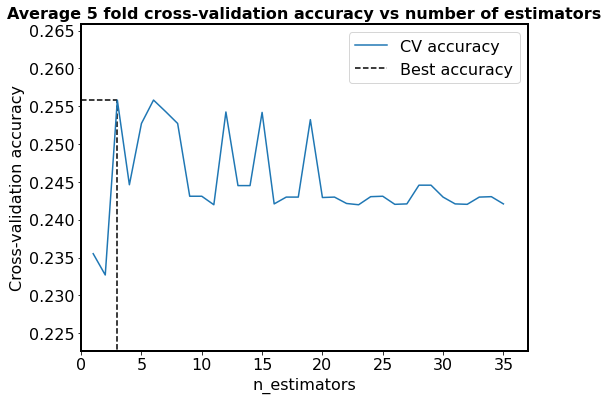

In [27]:
# Finding the optimal n_estimators
best_accuracy = max(accuracy_list)
best_n_estimators = np.argmax(accuracy_list)+1

# Plotting accuracy vs n_estimators
plt.figure(figsize=(8,6))
plt.plot(range(1,estimator_limit+1), accuracy_list, label="CV accuracy")
plt.hlines(best_accuracy, xmin=0, xmax=best_n_estimators, linestyles="dashed", colors="k", label="Best accuracy")
plt.vlines(best_n_estimators, ymin=0, ymax=best_accuracy, linestyles="dashed", colors="k")
plt.xlim((0, estimator_limit+2))
plt.ylim((min(accuracy_list)-0.01, max(accuracy_list)+0.01))
plt.xlabel("n_estimators")
plt.ylabel("Cross-validation accuracy")
plt.title("Average 5 fold cross-validation accuracy vs number of estimators", fontweight="bold")
plt.legend()
plt.show()

The accuracy keeps fluctuating between 0.23 - 0.26 and later flattens out. The default value of n_estimators in sklearn is 100 and we will keep it that way as we haven't found any other better value.

In [48]:
# Building the best AdaBoost model
boosting_model = AdaBoostClassifier(random_state = random_state)

# Fitting the training data
boosting_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=44)

## Comparing performance of all the models

We built a Logistic Regression model as a baseline model, followed by a single Decision Tree, Bagging, Random Forest and Boosting. In theory, the performance should consistently increase as the model gets more sophisticated. We will check that soon.

In order to test our model, we have been asked to use the FIFA 20 dataset, but using only players belonging to the following clubs:
* FC Barcelona
* FC Bayern München
* Real Madrid
* Paris Saint-Germain
* Juventus
* Atlético Madrid
* Manchester City
* Liverpool
* Manchester United

The first step is to load the test data, select the players belonging to these specific clubs and then preprocess it the same way training data was preprocessed.

In [29]:
# Loading the test data (FIFA 20 dataset)
df_test = pd.read_csv('./data/players_20.csv')

# The list of clubs to test
club_list = ["Real Madrid", "FC Bayern München", "FC Barcelona", "Juventus", "Manchester United", \
             "Manchester City", "Liverpool", "Atlético Madrid", "Paris Saint-Germain"]

# Indices of players to retain after preprocessing
retain_indices = df_test.index[df_test['club'].isin(club_list)].tolist()

# Preprocessing the data same way as the training data
df_test = preprocessor.fit(df_test.copy())

# Retaining players from the club_list
df_test = df_test.iloc[retain_indices].reset_index(drop=True)

Retaining the players and then preprocessing the test data is computationally efficient. However, when we tried that, we found that none of the players from the clubs mentioned have a work_rate value of 'Low/Low'. This leads to a missing column if we retain players first and then process the data. 

In [30]:
# Taking a quick look at the test data
df_test.head()

age  height_cm  weight_kg  overall  value_eur player_positions  \
0   32        170         72       94   95500000       CF, ST, RW   
1   34        187         83       93   58500000           ST, LW   
2   27        175         68       92  105500000          CAM, LW   
3   26        188         87       91   77500000               GK   
4   28        175         74       91   90000000           CF, LW   

   international_reputation  weak_foot  skill_moves  release_clause_eur  ...  \
0                         5          4            4         195800000.0  ...   
1                         5          4            5          96500000.0  ...   
2                         5          5            5         195200000.0  ...   
3                         3          3            1         164700000.0  ...   
4                         4          4            4         184500000.0  ...   

   work_rate_High/Medium  work_rate_Low/High  work_rate_Low/Low  \
0                      0                   0                  0   
1                      0                   0                  0   
2                      1                   0                  0   
3                      0                   0                  0   
4                      1                   0                  0   

   work_rate_Low/Medium  work_rate_Medium/High  work_rate_Medium/Low  \
0                     0                      0                     1   
1                     0                      0                     0   
2                     0                      0                     0   
3                     0                      0                     0   
4                     0                      0                     0   

   work_rate_Medium/Medium  body_type_Lean  body_type_Normal  body_type_Stocky  
0                        0               0                 1                 0  
1                        0               0                 1                 0  
2                        0               0                 1                 0  
3                        1               0                 1                 0  
4                        0               0                 1                 0  

[5 rows x 99 columns]

It is mentioned in the problem statement that the scoring metric is classification accuracy. So we find the classification accuracy of all the models built so far. 

It is easier to have a dictionary with model names and the actual models in it. This saves programming time and effort.

In [68]:
# Creating the model dictionary
model_dict = {
    "Baseline model": base_model,
    "Decision Tree": dtree_model,
    "Bagging": bagging_model,
    "Random Forest": random_forest_model,
    "Boosting": boosting_model
}

In [51]:
# Setting the predictor and true response values
X_test = df_test.drop('player_positions', axis=1)
y_test = df_test['player_positions']

### Classification accuracy

In [69]:
# Computing classification accuracy for all the models
t1 = PrettyTable(['Model name', 'Classification accuracy'])

for model_name, model in model_dict.items():
    score = model.score(X_test, y_test)
    t1.add_row([model_name, score])
    
print(t1)

+----------------+-------------------------+
|   Model name   | Classification accuracy |
+----------------+-------------------------+
| Baseline model |   0.12195121951219512   |
| Decision Tree  |   0.42160278745644597   |
|    Bagging     |    0.4912891986062718   |
| Random Forest  |    0.662020905923345    |
|    Boosting    |   0.13588850174216027   |
+----------------+-------------------------+


**Random Forest** is the best model for this task according to classification accuracy.

### F1 score

In [70]:
# Computing the f1-score for all the models
t2 = PrettyTable(['Model name', 'F1 score'])

for model_name, model in model_dict.items():
    score = f1_score(y_test, model.predict(X_test), average="weighted")
    t2.add_row([model_name, score])
    
print(t2)

+----------------+---------------------+
|   Model name   |       F1 score      |
+----------------+---------------------+
| Baseline model | 0.03799040264919315 |
| Decision Tree  |  0.3479467741683974 |
|    Bagging     |  0.4092438249493772 |
| Random Forest  |  0.6363220193369281 |
|    Boosting    | 0.03592984113860509 |
+----------------+---------------------+


Again, based on F1 score, Random Forest performs best.

In [71]:
# Setting the best model
best_model = random_forest_model

### The predictions

In [72]:
# Getting the predictions from the best model
y_pred = best_model.predict(X_test)

In order to visualize the predictions, it is convenient to categorize the positions into attackers, midfielders, defenders and goalkeepers.

In [108]:
# Defining and grouping positions
attack_positions = {'ST', 'LW', 'RW', 'CF', 'LF', 'RF'}
midfield_positions = {'LM', 'RM', 'CM', 'CAM', 'CDM'}
defence_positions = {'LWB', 'RWB', 'CB', 'LB', 'RB'}
goalkeeper = {'GK'}

In [116]:
def set_positions(y):
    """
    Categorizes the positions in y into attackers, midfielders, defenders and goalkeepers
    
    Parameters
    ----------
    arg1 : list (or) Pandas Series (or) Numpy 1D array
    
    Returns
    -------
    Dictionary
        Dictionary containing the count of number of attacker, midfielders, defenders and goalkeepers
    """
    
    position_dict = {
        "Attackers": 0,
        "Midfielders": 0,
        "Defenders": 0,
        "Goalkeepers": 0
    }
    
    for i in range(len(y)):
        # Splitting the string into individual positions
        y_split = set(y[i].split(", "))
        
        # Checking if any position in y[i] is an attacking position
        if bool(y_split & attack_positions):
            position_dict["Attackers"]+=1
            
        # Checking if any position in y[i] is a midfield position
        if bool(y_split & midfield_positions):
            position_dict["Midfielders"]+=1
            
        # Checking if any position in y[i] is a defensive position
        if bool(y_split & defence_positions):
            position_dict["Defenders"]+=1
            
        # Checking if any position in y[i] is a goalkeeper
        if bool(y_split & goalkeeper):
            position_dict["Goalkeepers"]+=1
            
    return position_dict

In [118]:
# Categorizing the original and predicted positions
predicted_positions = set_positions(y_pred)
original_positions = set_positions(y_test)

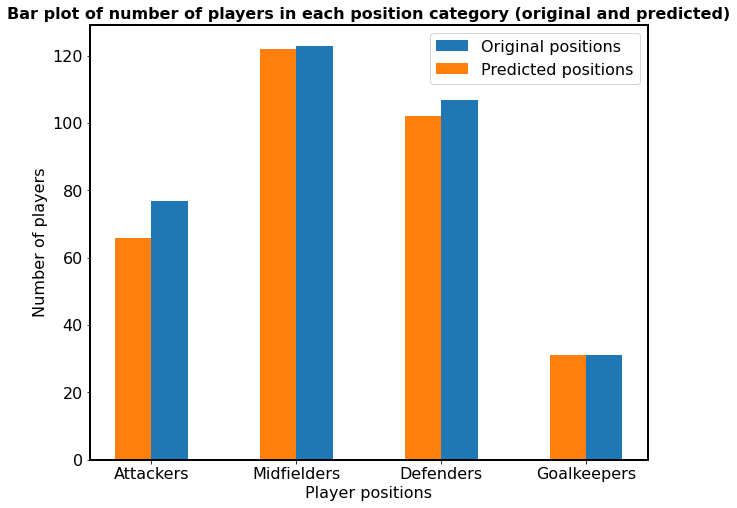

In [177]:
plt.figure(figsize=(10,8))
w = 0.25
plt.bar(original_positions.keys(), original_positions.values(), +w, align="edge", label = "Original positions")
plt.bar(predicted_positions.keys(), predicted_positions.values(), -w, align="edge", label = "Predicted positions")
plt.xlabel("Player positions")
plt.ylabel("Number of players")
plt.title("Bar plot of number of players in each position category (original and predicted)", fontweight="bold")
plt.legend()
plt.show()

The plot above gives a visual representation of number of players in each category, both in original and predicted values. They are very similar and the differences are negligible. There is almost no difference in the number of goalkeepers.

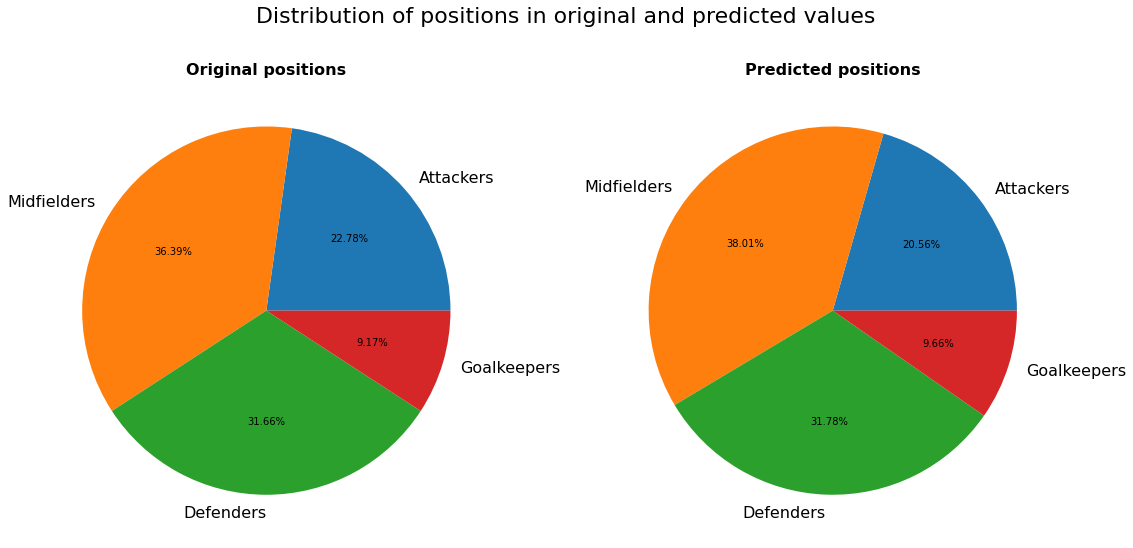

In [176]:
fig, axs = plt.subplots(1,2)
axs[0].pie(original_positions.values(), labels = original_positions.keys(), autopct='%1.2f%%')
axs[0].set_title("Original positions", fontweight = "bold")

axs[1].pie(predicted_positions.values(), labels = predicted_positions.keys(), autopct='%1.2f%%')
axs[1].set_title("Predicted positions", fontweight = "bold")

fig.suptitle("Distribution of positions in original and predicted values")
plt.tight_layout()
plt.subplots_adjust(top=1.1)
plt.show()

From the plot above, the distribution of player positions are identical in both plots excepth that the model predicted more players as midfielders and less players as attackers. 

It would be interesting to see if the model captures any relationship or ordering between position categories. The following code cell aids in finding that.

In [226]:
# A function to categorize the position as attacker, midfielder, defender or goalkeeper
def categorize(y):
    """
    Categorized player positions as 3, 2, 1 and 0 based on how high up the field they play
    
    Parameters
    ----------
    arg1 : list
        A list containing the abbreviated player position strings
        
    Returns
    -------
    int
        The encoded value of the position
    """
    y_split = set(y.split(", "))
    
    if bool(y_split & attack_positions):
        return 3
    
    if bool(y_split & midfield_positions):
        return 2
    
    if bool(y_split & defence_positions):
        return 1
    
    if bool(y_split & goalkeeper):
        return 0

# A list to store the category of mis-classified examples
y_test_cat = []
y_pred_cat = []

for i in range(len(y_test)):
    # If i-th example is misclassified, store its category
    if y_pred[i] != y_test[i]:
        y_test_cat.append(categorize(y_test[i]))
        y_pred_cat.append(categorize(y_pred[i]))

The above cell encodes attackers as 3, midfielders as 2, defenders as 1 and goalkeepers as 0. The difference between the predicted and actual value should be ideally 0 (indicating that the model predicted the same position). The higher the magnitude of difference, the worse the model has performed. That is, if the model predicted a goalkeeper as an attacker, the magnitude of this "classification difference" would be 3.

In [225]:
print("The maximum classification difference is: ", max(np.abs(np.array(y_test_cat)-np.array(y_pred_cat))))

The maximum classification difference is:  1


This classification difference highlights an important property of the model - it captured the relative position of the players. The model never classified a defender as an attacker and an attacker as a goalkeeper. It modelled the fact that midfielders and attackers are more closely related than defenders and attackers. This fact is borne by the the maximum classification difference printed above.

## Discussions and conclusion

The task of predicting the player position was modelled using multiple techniques learnt in class. Based on the models built, it seems like Random Forest performs best. But there are several factors to consider regarding the performance of these models:
* <u>Scoring method</u>: Classification accuracy could make it look like the models are performing poorer than they actually are. For example, a player position of 'LW, ST' denotes that the player is an attacker. A model that predicts only 'ST' or 'ST, CF' gets penalized the same as a model that predicts 'GK'. In reality, the model which predicted only 'ST' or 'ST, CF' is performing better than the model predicting 'GK'.


* <u>Position relation</u>: The fact that the maximum classification difference is 1 indicates that the model actually performs very well. Classification accuracy is unforgiving, as explained in the previous point. The fact that no defender got classified as an attacker or vice-versa indicates that the model understands the relation between player positions (that is, midfielders are more related to attackers than goalkeepers in terms of skills and functionality). To realize how good the model actually is, we need to have a better method for representing the response variables, as mentioned in the points below. 


* <u>Data preprocessing</u>: While preprocessing, we had to one-hot encode several features, which can affect the performance of the model by creating sparse matrices. Moreover, exclusion of several features and inclusion of several others cannot be completely justified. 


* <u>Response variable</u>: The response variable had multiple positions for several players. As far as the model goes, it treats 'ST' the same as 'GK' and 'ST, LW', while in reality 'ST, LW' is more closely related to 'ST' than 'GK'. One-hot encoding the response variable and assigning multiple positions to players introduces several new problems in classification thresholds. A better representation of data is required in this case.


* <u>Categorizing positions</u>: Categorizing player positions as "attack", "midfield", "defence" and "goalkeeper" can significantly improve the model performance but this waters down the problem complexity. We have avoided such categorization and even when taking multiple positions, Random Forest gives a accuracy of ~65%.


* <u>Class imbalance</u>: With the given processing for response variables, there is a major class imbalance. Training ensemble models with balanced class_weights only deteriorates the performance of the model.


* <u>Hyperparameters</u>: We tuned the hyperparameters based on OOB error for ensemble methods as it is computationally cheaper and easier. Small changes in hyperparameters can alter the performance of the model, sometimes making it better. 


* <u>Hypothesis Testing</u>: Our attempt at hypothesis testing to find significant features using baseline model failed. By looking at the magnitude of coefficients of the baseline model we realized that the model performed very poorly. This statement is justified by the final performance of the model by looking at the classification accuracy and F1 score. Both indicate that the baseline model performs very poorly and this model is not suitable for hypothesis testing.


* <u>Model Performance</u>: As expected, the performance steadily increased till Random Forest but plummeted at boosting. It is understandable given that boosting works on reducing the bias whereas Random Forest works on reducing the variance. Given the magnitude of the problem, deep Decision Trees definitely perform better and reducing the variance could be a better approach than to build better model using many shallow trees.

# PART C: Which Club has the Best Staff

 - Study player data from Division 1 European League players from the last 5 Years. Analyze changes in player stats and value. Rank the clubs according to best increase in statistics of a player

 - Graphically represent the scores for the test set

Details :

 - Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning. 

 - Assign a score to all clubs out of 100, and represent it in an appropriate visualization. With 100 being the highest 

 - For the test set, your model will be scored using MSE against the average of all models of the class. (Score = MSE( Your Values , Average of all models values))

The test set is as follows for this problem statement (Division 1 European League): Leagues to be considered

 - Premier League - English Premier League

 - Bundesliga German 1. Bundesliga

 - Ligue 1 French Ligue 1

 - La Liga Spain Primera Division

 - Serie A Italian Serie A

### preparing the test set

In [8]:
leagues_consider = ['English Premier League', 'German 1. Bundesliga', 'French Ligue 1', 'Spain Primera Division', 'Italian Serie A']

In [226]:
team_and_league = pd.read_csv('teams_and_leagues.csv')

In [227]:
team_and_league.head(2)

url              league_name
0  241  Spain Primera Division 
1   11  English Premier League

In [228]:
team_and_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          1080 non-null   int64 
 1   league_name  1080 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.0+ KB


In [229]:
!pip install tqdm

#### Getting clubs and their leagues, by parsing HTML pages page of sofifa website
 - teams_and_league dataset contain sofifa website url number, and league_name
 - for Example:
  - url: 241
  - league_name: Spain Primera Division
 - Url 241: indicates https://sofifa.com/team/241/, which belongs to club FC Barcelona that plays in Spain Primera Division
 - By using this we extracted club names by using url number

In [233]:
clubs = []

# importing the modules
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
for i in tqdm(list(team_and_league['url'].unique())):
    # target url
    url = f'https://sofifa.com/team/{i}/'

    # making requests instance
    reqs = requests.get(url)

    # using the BeautifulSoup module
    soup = BeautifulSoup(reqs.text, 'html.parser')

    # extracting title that contains club name
    for title in soup.find_all('title'):
        titl = title.get_text()
    club_name = titl[:titl.find('FIFA 22')-1]
    clubs.append(club_name)

100%|██████████████████████████████████████████████████████████████████████████████| 1009/1009 [14:14<00:00,  1.18it/s]


In [234]:
url_club = {}
for i, j in zip(list(team_and_league['url'].unique()), clubs):
    url_club[i] = j

In [235]:
# mapping extracted club names with league
clubs = []
for i in team_and_league['url']:
    clubs.append(url_club[i])

team_and_league['club'] = clubs

In [236]:
team_and_league.head(2)

url              league_name               club
0  241  Spain Primera Division        FC Barcelona
1   11  English Premier League   Manchester United

In [237]:
team_and_league['league_name'] = team_and_league['league_name'].str.rstrip()

In [238]:
teams_consider = team_and_league[team_and_league['league_name'].isin(leagues_consider)]
teams_consider.reset_index(drop=True, inplace=True)

In [241]:
clubs_consider = teams_consider['club'].unique()

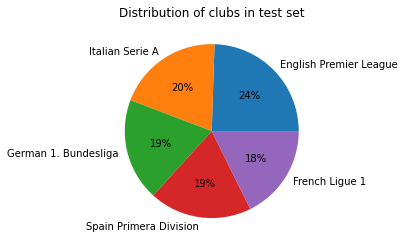

In [290]:
pie_data = teams_consider['league_name'].value_counts()
plt.pie(pie_data.values, labels = pie_data.index, autopct='%.0f%%')
plt.title('Distribution of clubs in test set')
plt.show()

#### filtering predictors

Removing meta data, tags, nationality, jersey numbers, traits, loaned and joined details. Which will not contrinute to problem statement

Following columns are omitted:
 - 'sofifa_id', 'player_url', 'short_name', 'long_name', 'dob', 'nationality', 'player_positions', 'preferred_foot','wage_eur', 'player_tags','work_rate','team_position','nation_position','nation_jersey_number','player_traits','contract_valid_until','loaned_from', 'joined','real_face'

In [24]:
fifa_df = fifa.copy()

In [26]:
features = list(fifa_df.columns)

In [27]:
rem = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'dob', 'nationality', 'player_positions', 'preferred_foot','wage_eur', 'player_tags','work_rate','team_position','nation_position','nation_jersey_number','player_traits','contract_valid_until','loaned_from', 'joined','real_face']

In [28]:
final_feats = list(set(features).difference(set(rem)))

In [30]:
fifa_final = fifa_df[final_feats]

In [291]:
print(f'The shape of fifa_final DataFrame is: {fifa_final.shape}')

The shape of fifa_final DataFrame is: (85498, 86)


In [32]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85530 entries, 0 to 14880
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lb                          75986 non-null  object 
 1   attacking_crossing          85530 non-null  object 
 2   power_stamina               85530 non-null  object 
 3   lw                          75986 non-null  object 
 4   gk_speed                    9544 non-null   float64
 5   mentality_positioning       85530 non-null  object 
 6   rcb                         75986 non-null  object 
 7   gk_positioning              9544 non-null   float64
 8   lcb                         75986 non-null  object 
 9   movement_reactions          85530 non-null  object 
 10  rb                          75986 non-null  object 
 11  cm                          75986 non-null  object 
 12  club                        85530 non-null  object 
 13  attacking_short_passing     855

#### Processing data

Processing categorical data by ordinal encoding

In [33]:
fifa_final = fifa_final[fifa_final['body_type'].isin(['Normal', 'Lean', 'Stocky'])]

In [249]:
print('The shape of fifa_final DataFrame:',fifa_final.shape)

The shape of fifa_final DataFrame: (85498, 86)


In [35]:
# replacing body_type with ordinal encoding
rep = {'Normal':1, 'Lean':0, 'Stocky':2}
fifa_final.replace(rep, inplace=True)

In [36]:
fifa_final_df = fifa_final.fillna(0)

In [248]:
print('The shape of fifa_final_df DataFrame:', fifa_final_df.shape)

The shape of fifa_final_df DataFrame: (85498, 86)


Stats contains values such as '89+3', '92+0', '74-1'. Converting them to numerical by performing mathematical operation

In [39]:
# code to convert stats of player, '89+3' --> 92, or '89-2' --> 87
def add_up(x):
    if '-' in str(x):
        a = str(x).split('-')
        a = list(map(float, a))
        return a[0]-a[1]
    a = str(x).split('+')
    a = list(map(float, a))
    return sum(a)

In [40]:
# processing entire data to remove '89+2' or '89-2' type of strings
for i in fifa_final_df.columns:
    if i not in ['year', 'club']:
        fifa_final_df[i] = fifa_final_df[i].apply(add_up)

In [41]:
fifa_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85498 entries, 3 to 14880
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lb                          85498 non-null  float64
 1   attacking_crossing          85498 non-null  float64
 2   power_stamina               85498 non-null  float64
 3   lw                          85498 non-null  float64
 4   gk_speed                    85498 non-null  float64
 5   mentality_positioning       85498 non-null  float64
 6   rcb                         85498 non-null  float64
 7   gk_positioning              85498 non-null  float64
 8   lcb                         85498 non-null  float64
 9   movement_reactions          85498 non-null  float64
 10  rb                          85498 non-null  float64
 11  cm                          85498 non-null  float64
 12  club                        85498 non-null  object 
 13  attacking_short_passing     854

We have 86 columns, Excluding club, and year, we have 84 columns as stats for the player.

#### Grouping data by club and year. Which gives all players data, corresponding to a club and particular year. Getting the mean of the grouped data gives stats of the payer by club and year

In [42]:
fifa_grouped = fifa_final_df.groupby(['club', 'year']).mean()

In [244]:
clubs = fifa_final_df['club'].unique()

In [245]:
print(f'Total number of clubs: {len(clubs)}')

Total number of clubs: 892


#### After the clubs stats per year, difference between stats of present year and last year is computed to see increase in the stats of club performance. 

Note: if a team haven't played for atleast 2 consecutive years, it will be omitted.

In [256]:
year = [17, 18, 19, 20]
new_fifa_diff = pd.DataFrame()
l=[]
## computing difference between stats of clubs based on years
for i in clubs:
    for j in year:
        if (i,j) in fifa_grouped.index and (i, j-1) in fifa_grouped.index:
            diff = fifa_grouped.loc[(i,j)] - fifa_grouped.loc[(i, j-1)]
            diff_df = pd.DataFrame(diff).T
            diff_df['club'] = i
#             diff_df['year'] = f'{j}-{j-1}'
            l.append(diff_df)
        else:
            pass

In [257]:
new_diff_df = pd.concat(l)

In [258]:
print('The shape of new_diff_df DataFrame:', new_diff_df.shape)

The shape of new_diff_df DataFrame: (2348, 85)


In [259]:
clubs = new_diff_df['club'].unique()

In [260]:
new_diff_df.set_index('club', inplace=True)

#### After computing difference, over years. Computing the means to get the avergae improvement over the years

In [261]:
k = []
for i in clubs:
    df = new_diff_df.loc[i]
    if len(df.shape)>1:
        meaned_diff = pd.DataFrame(df.mean(axis=0)).T
        meaned_diff['club'] = i
        k.append(meaned_diff)
    else:
        pass

In [262]:
final_df = pd.concat(k)

In [263]:
print('The shape of final_df DataFrame:', final_df.shape)

The shape of final_df DataFrame: (633, 85)


In [264]:
print(f'Number of clubs after calculating: {final_df["club"].nunique()}')

Number of clubs after calculating: 633


In [265]:
final_df.set_index('club', inplace=True)
final_df.head(2)

lb  attacking_crossing  power_stamina        lw  \
club                                                                     
Atlético Madrid  0.257879           -0.944545      -0.545455  0.552121   
Real Madrid      1.596354            0.865104       1.496875  1.698438   

                 gk_speed  mentality_positioning       rcb  gk_positioning  \
club                                                                         
Atlético Madrid -0.400303               0.693333  0.433333       -0.490000   
Real Madrid     -0.627604               1.642708  1.689063       -0.673437   

                      lcb  movement_reactions  ...  defending_standing_tackle  \
club                                           ...                              
Atlético Madrid  0.433333            0.068182  ...                  -0.271818   
Real Madrid      1.689063            1.161979  ...                   0.592708   

                 attacking_heading_accuracy        rf  movement_agility  \
club                                                                      
Atlético Madrid                    0.470909  0.667879         -0.769091   
Real Madrid                        1.875521  1.760417          1.132812   

                 defending       lam  attacking_finishing       rdm  \
club                                                                  
Atlético Madrid   0.153030  0.623030             0.373636  0.296667   
Real Madrid       1.448438  1.685938             0.879687  1.667188   

                    value_eur       lwb  
club                                     
Atlético Madrid  1.358038e+06  0.242121  
Real Madrid      2.264661e+06  1.612500  

[2 rows x 84 columns]

#### Performing MinMAX Scaling, over the columns. So that top performer per skill gets 100 marks, worst performer gets 0. MinMAX Scaling is performed over features instaed of entire average is because, each feature may have different scale in rating

In [267]:
#### performing MINMAXScaling
final_scores = pd.DataFrame()
for i in final_df.columns:
    means = final_df[[i]]
    final_scores[i] = MinMaxScaler((0, 100)).fit_transform(means.values).reshape(-1)
    
final_scores['club'] = final_df.index

In [268]:
final_scores.head(2)

lb  attacking_crossing  power_stamina         lw   gk_speed  \
0  50.382333           35.026608      27.272727  49.041475  52.272646   
1  54.903918           43.854167      34.502212  52.955051  51.299715   

   mentality_positioning        rcb  gk_positioning        lcb  \
0              58.001176  52.386125       45.704074  52.386125   
1              61.349941  56.639895       45.179593  56.639895   

   movement_reactions  ...  attacking_heading_accuracy         rf  \
0           48.852901  ...                    48.90642  49.527284   
1           61.842668  ...                    54.25400  53.256048   

   movement_agility  defending        lam  attacking_finishing        rdm  \
0         52.717101  52.353962  49.065351            61.395058  50.503223   
1         60.697115  57.062673  52.685935            63.133319  55.103293   

   value_eur        lwb             club  
0  55.569793  49.982648  Atlético Madrid  
1  80.363073  54.589804      Real Madrid  

[2 rows x 85 columns]

In [269]:
final_scores.set_index('club', inplace=True)

#### Averaging the score achieved over all the stats, to get the final score for the clubs

In [270]:
total_score = pd.DataFrame(final_scores.mean(axis=1), columns=['score'])

In [271]:
total_score.head(2)

score
club                      
Atlético Madrid  49.341408
Real Madrid      53.817658

In [272]:
total_score.sort_values(by='score', ascending=False, inplace=True)

In [273]:
total_score.drop_duplicates(inplace=True)

In [274]:
total_score.reset_index(inplace=True)

In [275]:
print('Top 10 best staff belongs to club:')
total_score.head(10)

Top 10 best staff belongs to club:


club      score
0                 Uruguay  77.478357
1              Fluminense  71.887042
2             New Zealand  62.196211
3                Cameroon  60.090342
4                  Greece  59.150207
5      Santiago Wanderers  58.543762
6                 Ecuador  57.438866
7               Amiens SC  56.684182
8  Club Atlético Aldosivi  55.440927
9                 Brescia  55.324411

In [276]:
total_score.to_csv('scores.csv', index=False)

#### computing ranks based on scores

In [207]:
ranks = total_score.reset_index()

In [208]:
ranks.drop('score', axis=1, inplace=True)

In [209]:
ranks.columns=['rank', 'club']
ranks['rank'] = ranks['rank']+1
ranks = ranks[['club', 'rank']]

In [277]:
print('Top 10 teams:')
ranks.head(10)

Top 10 teams:


club  rank
0                 Uruguay     1
1              Fluminense     2
2             New Zealand     3
3                Cameroon     4
4                  Greece     5
5      Santiago Wanderers     6
6                 Ecuador     7
7               Amiens SC     8
8  Club Atlético Aldosivi     9
9                 Brescia    10

In [211]:
ranks.to_csv('fifa_ranks.csv', index=False)

### filtering stats for data that belongs to test set

In [212]:
test_ranks = ranks[ranks['club'].isin(clubs_consider)]
test_ranks.reset_index(drop=True, inplace=True)

In [213]:
test_ranks.to_csv('test_set_ranks.csv', index=False)

In [214]:
test_scores = total_score[total_score['club'].isin(clubs_consider)]
test_scores.reset_index(drop=True, inplace=True)

In [216]:
test_scores.to_csv('test_set_scores.csv', index=False)

#### Result Visualization

Text(0, 0.5, 'count of clubs')

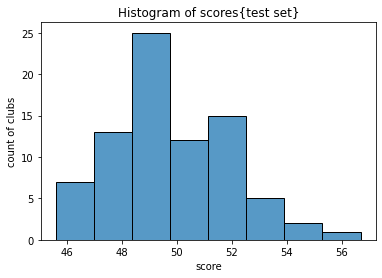

In [222]:
sns.histplot(test_scores['score'], bins = ())
plt.title('Histogram of scores{test set}')
plt.xlabel('score')
plt.ylabel('count of clubs')

From the above Histogram we can see that, most of the data from test set have score ranging from 48-50

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


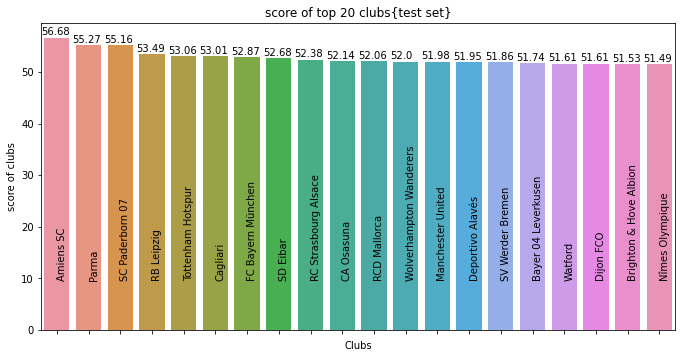

In [220]:
fir = plt.figure(figsize=(10, 5))
sns.barplot(test_scores['club'][:20], test_scores['score'][:20])
plt.tight_layout()
plt.title('score of top 20 clubs{test set}')
plt.xlabel('Clubs')
plt.ylabel('score of clubs')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

for x,y,z in zip(list(range(0, 20)), test_scores['score'][:20], test_scores['club'][:20]):
    plt.text(x-0.5, y+0.5, round(y,2))
    plt.text(x, 10, z, rotation=90)
plt.show()

The score of top 20 teams from test set, have been presented. WE can see thatthere is a minial decrease in score, over top teams.

##### Getiing average score

In [335]:
scores = own_test_scores[own_test_scores['club'].isin(clubs_common)][['club','score']]
scores.reset_index(drop=True, inplace=True)
for ind,i in enumerate(project_list):
    df = i[i['club'].isin(clubs_common)]
    scores['score_'+str(ind)] = list(df['score'])

In [337]:
scores.head(2)

club      score    score_0  score_1
0  Tottenham Hotspur  53.060838  97.105263    100.0
1  FC Bayern München  52.866244  97.105263     99.4

In [339]:
y_test = scores.mean(axis=1).values 

In [342]:
y_pred = list(scores['score'])

In [345]:
print(f'The MSE computed is: {mean_squared_error(y_test, y_pred)}')

The MSE computed is: 434.40527881333156
